# 연구과제

## 문제 (1)

다음의 데이터는 어느 백화점의 고객 데이터의 일부이다.

| 고객ID | 성별     | 나이 | 연수입 | 지출점수 |
|------|--------|----|-----|------|
| 1    | Male   | 19 | 15  | 39   |
| 2    | Male   | 21 | 15  | 81   |
| 3    | Female | 20 | 16  | 6    |
| 4    | Female | 23 | 16  | 77   |
| 5    | Female | 31 | 17  | 40   |

> https://data.hossam.kr/mldata/customer.xlsx

고객을 몇 등급으로 나누는 것이 가장 좋을지 분석하고 각 등급별 고객의 분포가 몇 %로 구성되어 있는지에 대한 시각화 자료를 제시하라.


In [7]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 내장된 컬러맵, 컬러맵 처리 유틸리티
from matplotlib import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
origin = read_excel("https://data.hossam.kr/mldata/customer.xlsx", index_col="고객ID")
origin

,성별,나이,연수입,지출점수
고객ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [9]:
df = my_labelling(origin, '성별')

+--------+---------+
| 성별   |   label |
|--------+---------|
| Female |       0 |
| Male   |       1 |
+--------+---------+


In [10]:
df

,성별,나이,연수입,지출점수
고객ID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [11]:
df2 = my_minmax_scaler(df)
df2

,성별,나이,연수입,지출점수
고객ID,,,,
1,1.0,0.019231,0.000000,0.387755
2,1.0,0.057692,0.000000,0.816327
3,0.0,0.038462,0.008197,0.051020
4,0.0,0.096154,0.008197,0.775510
5,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
196,0.0,0.326923,0.860656,0.795918
197,0.0,0.519231,0.909836,0.275510
198,1.0,0.269231,0.909836,0.744898


In [12]:
# scaled_df2.reset_index(inplace=True)

In [13]:
# filtered_df = scaled_df.filter(['연수입','지출점수'])

## #03. 클러스터링

### [1] 클러스터링 군집 모형 구현

In [30]:
estimator = KMeans(n_clusters=2, random_state=0)
estimator.fit(df2)

KMeans(n_clusters=2, random_state=0)

#### (3) 군집화 결과를 데이터프레임에 추가

In [31]:
cluster = estimator.predict(df2)

result_df = df2.copy()
result_df['cluster'] = cluster
result_df

,성별,나이,연수입,지출점수,cluster
고객ID,,,,,
1,1.0,0.019231,0.000000,0.387755,0
2,1.0,0.057692,0.000000,0.816327,0
3,0.0,0.038462,0.008197,0.051020,1
4,0.0,0.096154,0.008197,0.775510,1
5,0.0,0.250000,0.016393,0.397959,1
...,...,...,...,...,...
196,0.0,0.326923,0.860656,0.795918,1
197,0.0,0.519231,0.909836,0.275510,1
198,1.0,0.269231,0.909836,0.744898,0


In [16]:
estimator.cluster_centers_

array([[1.00000000e+00, 6.04567308e-01, 3.88661202e-01, 2.87840136e-01],
       [4.44089210e-16, 3.86504121e-01, 3.62704918e-01, 5.15579446e-01],
       [1.00000000e+00, 1.97115385e-01, 3.85245902e-01, 7.21173469e-01]])

## #04. 군집의 성능 평가

### [1] Inertia (이너셔)
#### (1) `2~10`까지 군집의 수를 늘려가면서 Inertia값 수집

In [17]:
klist = list(range(2, 11))
inertia = []

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df2)
    inertia.append(estimator.inertia_)
    
inertia

[37.27227241211876,
 29.552857611943857,
 22.39096001192855,
 19.060906968996807,
 16.43455254808258,
 14.229305695022063,
 12.253158647295091,
 10.625832251756343,
 9.403891128552733]

#### (2) Inertia 값 시각화

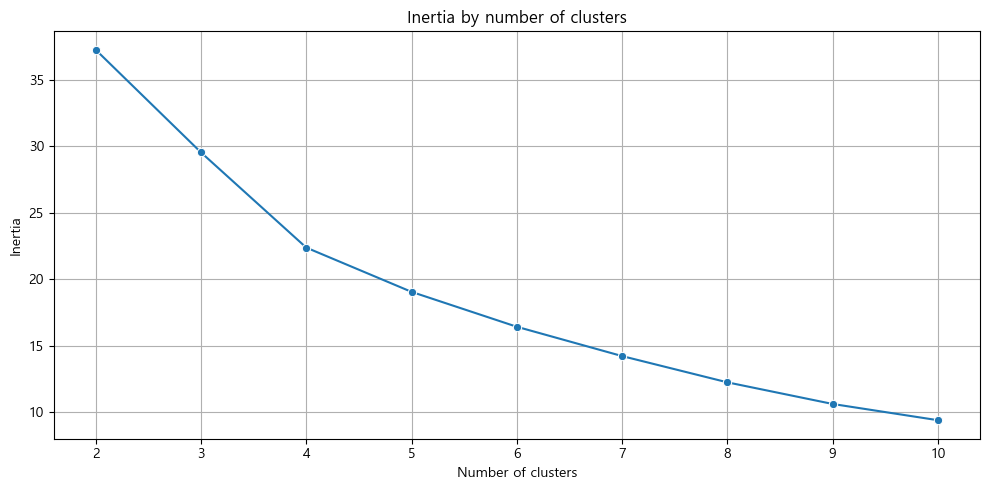

In [18]:
def my_callback(ax):
    ax.set_xlabel("Number of clusters")
    ax.set_ylabel("Inertia")
    ax.set_title("Inertia by number of clusters")
    
my_lineplot(df = None, xname =klist, yname = inertia, marker = "o", callback=my_callback)

> x축의 값이 4인 지점부터 감소가 완만하게 진행되는 것으로 보인다. 그러므로 최적의 클러스터 수는 4으로 판단할 수 있다.

#### (3) Elbow Point 계산

##### 변화율 계산

In [19]:
change_rates = [0]
for i in range(1, len(inertia)):
    change_rate = (inertia[i] - inertia[i-1]) / inertia[i-1]
    change_rates.append(change_rate)

change_rates

[0,
 -0.20710877820438447,
 -0.24234196550660503,
 -0.14872310258951338,
 -0.13778748436189742,
 -0.13418356518126207,
 -0.1388786698439054,
 -0.1328087264991043,
 -0.11499721567707184]

##### 변화율의 평균

In [20]:
avg_change_rate = np.mean(change_rates)
avg_change_rate

-0.13964772309597154

##### 평균 변화율보다 크게 감소하는 첫 번째 지점 찾기

In [21]:
elbow_point = next((i for i, rate in enumerate(change_rates) if rate < avg_change_rate), None)
elbow_point

1

##### 최적의 군집수

In [22]:
best_k = klist[elbow_point]
best_k

3

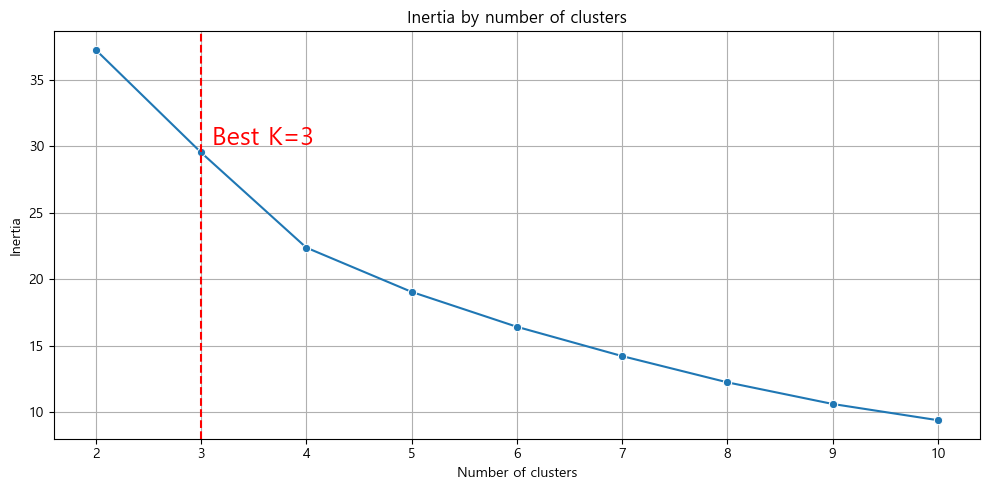

In [23]:
def my_callback(ax):
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Inertia by number of clusters')
    ax.axvline(x=klist[elbow_point], color='r', linestyle='--')

    ax.text(
        best_k+0.1, inertia[elbow_point]+0.1, "Best K=%d" % best_k, fontsize=18, ha="left", va="bottom", color="r"
    )

my_lineplot(df=None, xname=klist, yname=inertia, marker="o", callback=my_callback)

### [2] 실루엣 점수(계수)

#### (1) 각 데이터 포인트의 실루엣 계수 계산

In [24]:
silhouette_samples(X=df2, labels=cluster, metric='euclidean')

array([ 0.24497564,  0.4658918 ,  0.4016291 ,  0.44381877,  0.53748619,
        0.44326824,  0.42908596,  0.38197461,  0.41856428,  0.50344815,
        0.41821671,  0.4027087 ,  0.38204235,  0.4616023 ,  0.22775359,
        0.48595948,  0.55591782,  0.45571486,  0.36961845,  0.41611333,
        0.01203137,  0.48316205,  0.41654201,  0.43631573,  0.42279069,
        0.48956614,  0.54708771,  0.30054888,  0.56291416,  0.43651857,
        0.44940847,  0.47786378,  0.44050861,  0.51850707,  0.463184  ,
        0.45544923,  0.50898387,  0.5424767 ,  0.56587152,  0.4758452 ,
        0.41312192,  0.53582303,  0.34758018,  0.59352163,  0.53669334,
        0.54188367,  0.58524532,  0.58684153,  0.59613528,  0.60671896,
        0.5969122 ,  0.37877158,  0.61312532,  0.27841064,  0.58574056,
        0.29870694,  0.58491162,  0.414004  ,  0.59718771,  0.36127263,
        0.35886868,  0.47703736,  0.4262613 ,  0.56076284,  0.3969608 ,
        0.50541106,  0.63797227,  0.41275248,  0.50816516,  0.62

#### (2) 전체 데이터의 실루엣 계수에 대한 평균 스코어

보통 `0.5`가 넘으면 꽤 좋은 수치라고 함

In [26]:
silhouette_score(X=df2, labels=cluster, metric='euclidean')

0.45835255811254244

#### (3) 실루엣 스코어 시각화

In [27]:
def visualize_silhouette(estimator, X_features, cluster_labels, n_cluster): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    sil_avg = silhouette_score(X=X_features, labels=cluster_labels)
    sil_values = silhouette_samples(X=X_features, labels=cluster_labels)

    y_lower = 10
    plt.suptitle('Number of Cluster : '+ str(n_cluster)+', ' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")


      # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(
        X_features[X_features.columns[0]], X_features[X_features.columns[1]], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = estimator.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="r",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()
    plt.close()

#### (4) `2~10`까지 클러스터 수를 늘리면서 실루엣 점수 수집

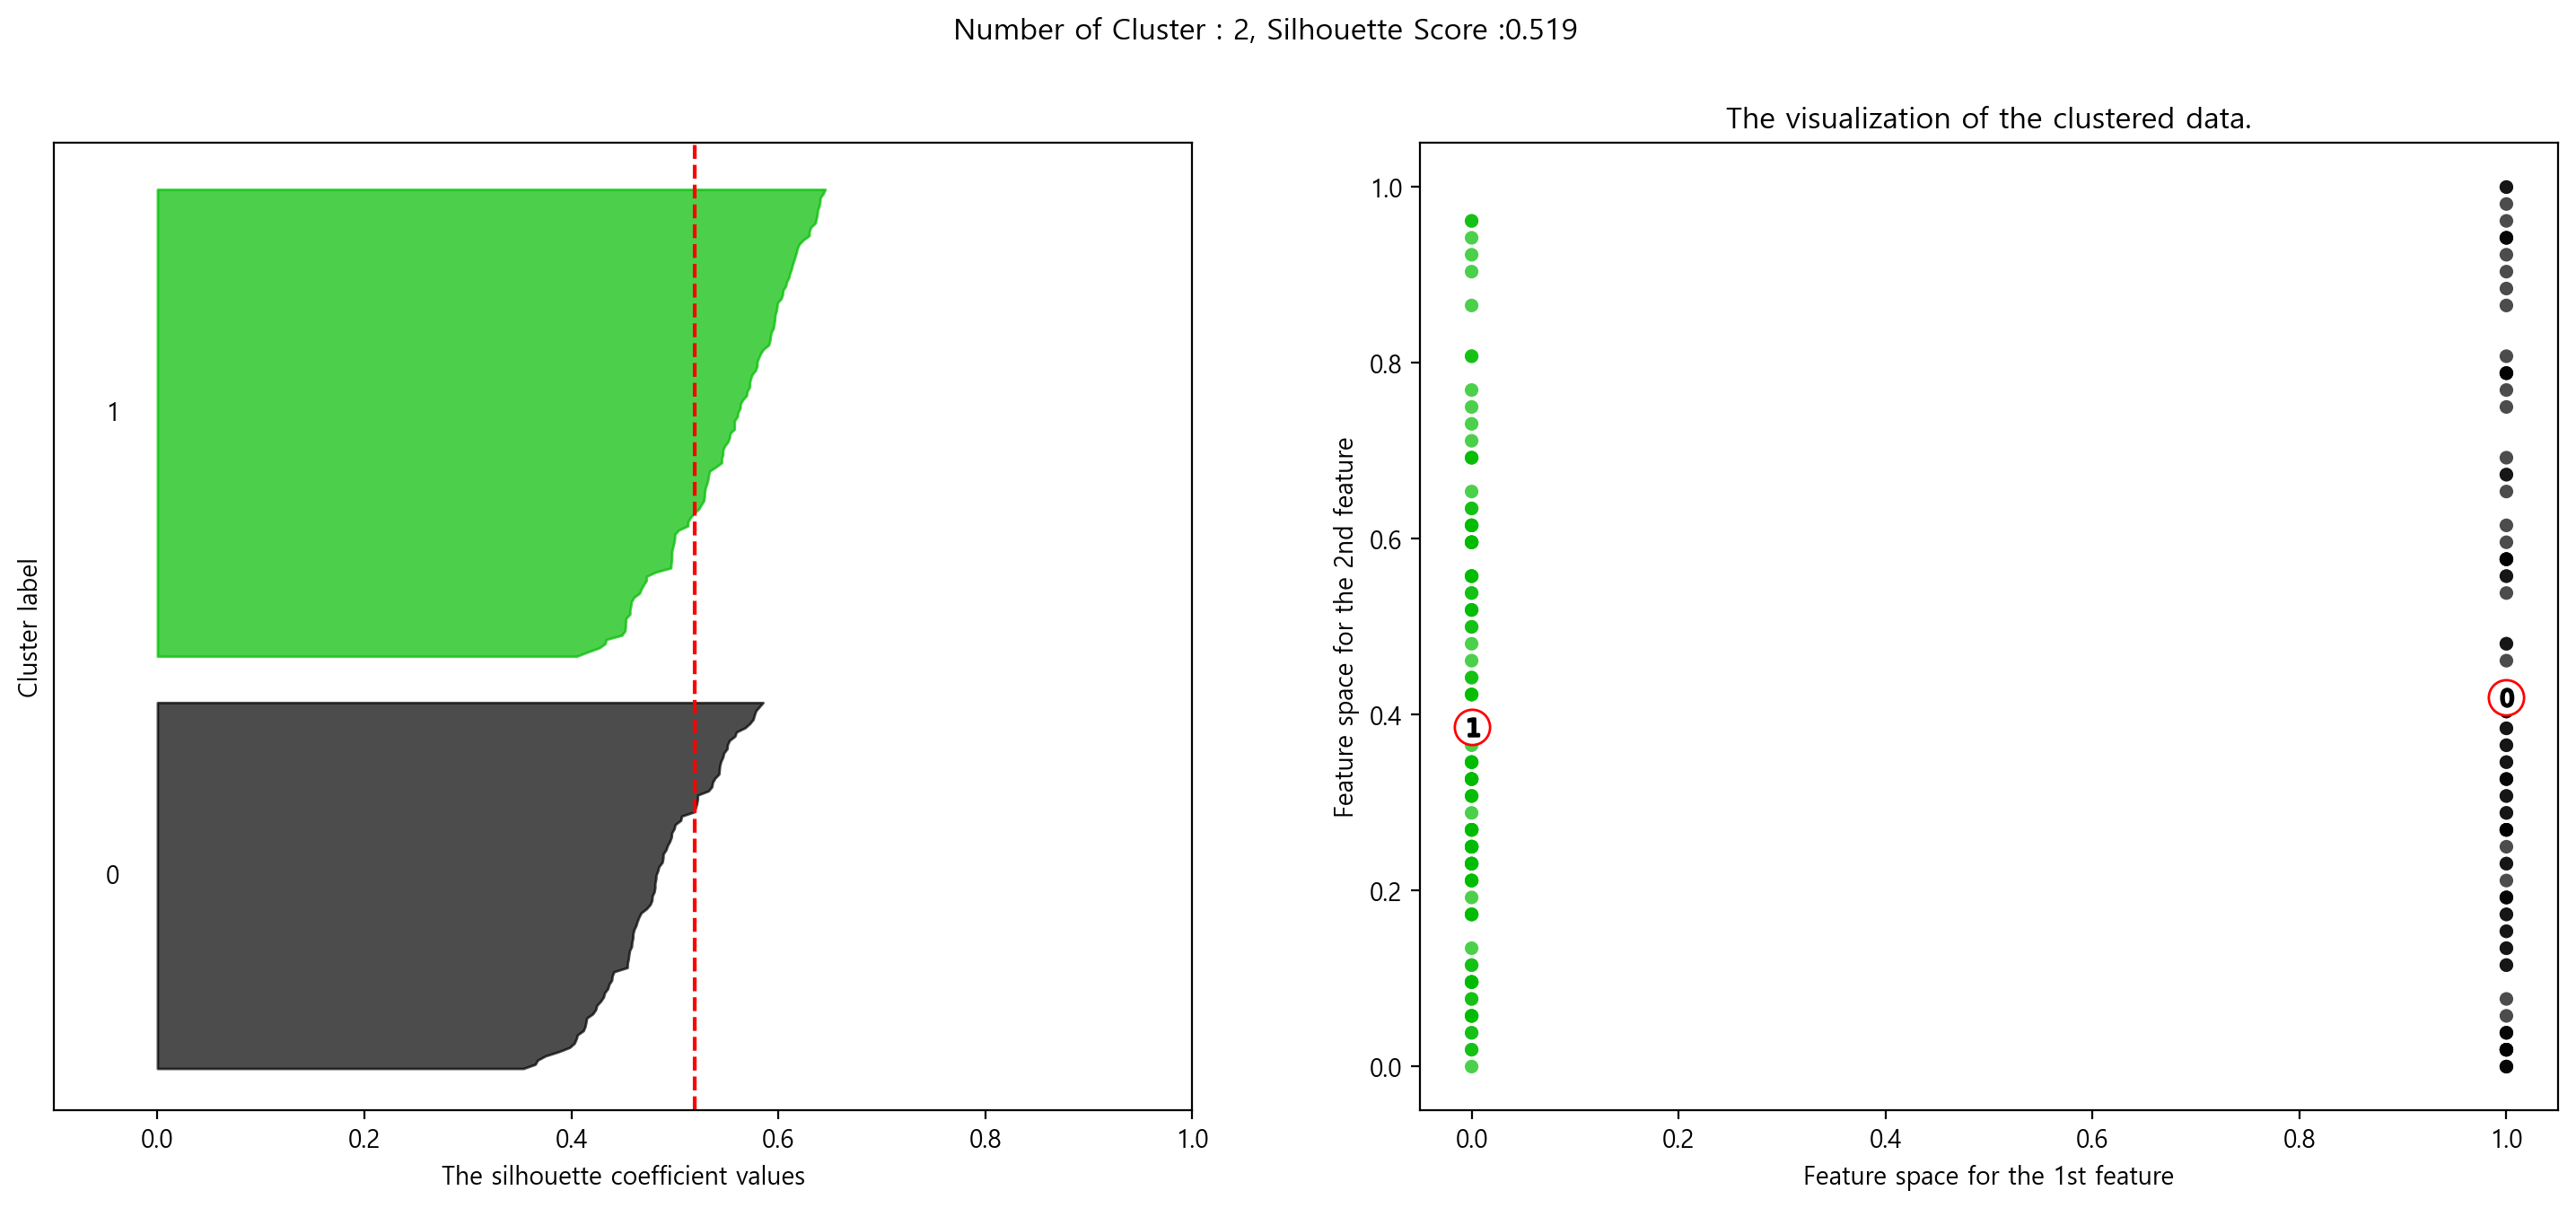

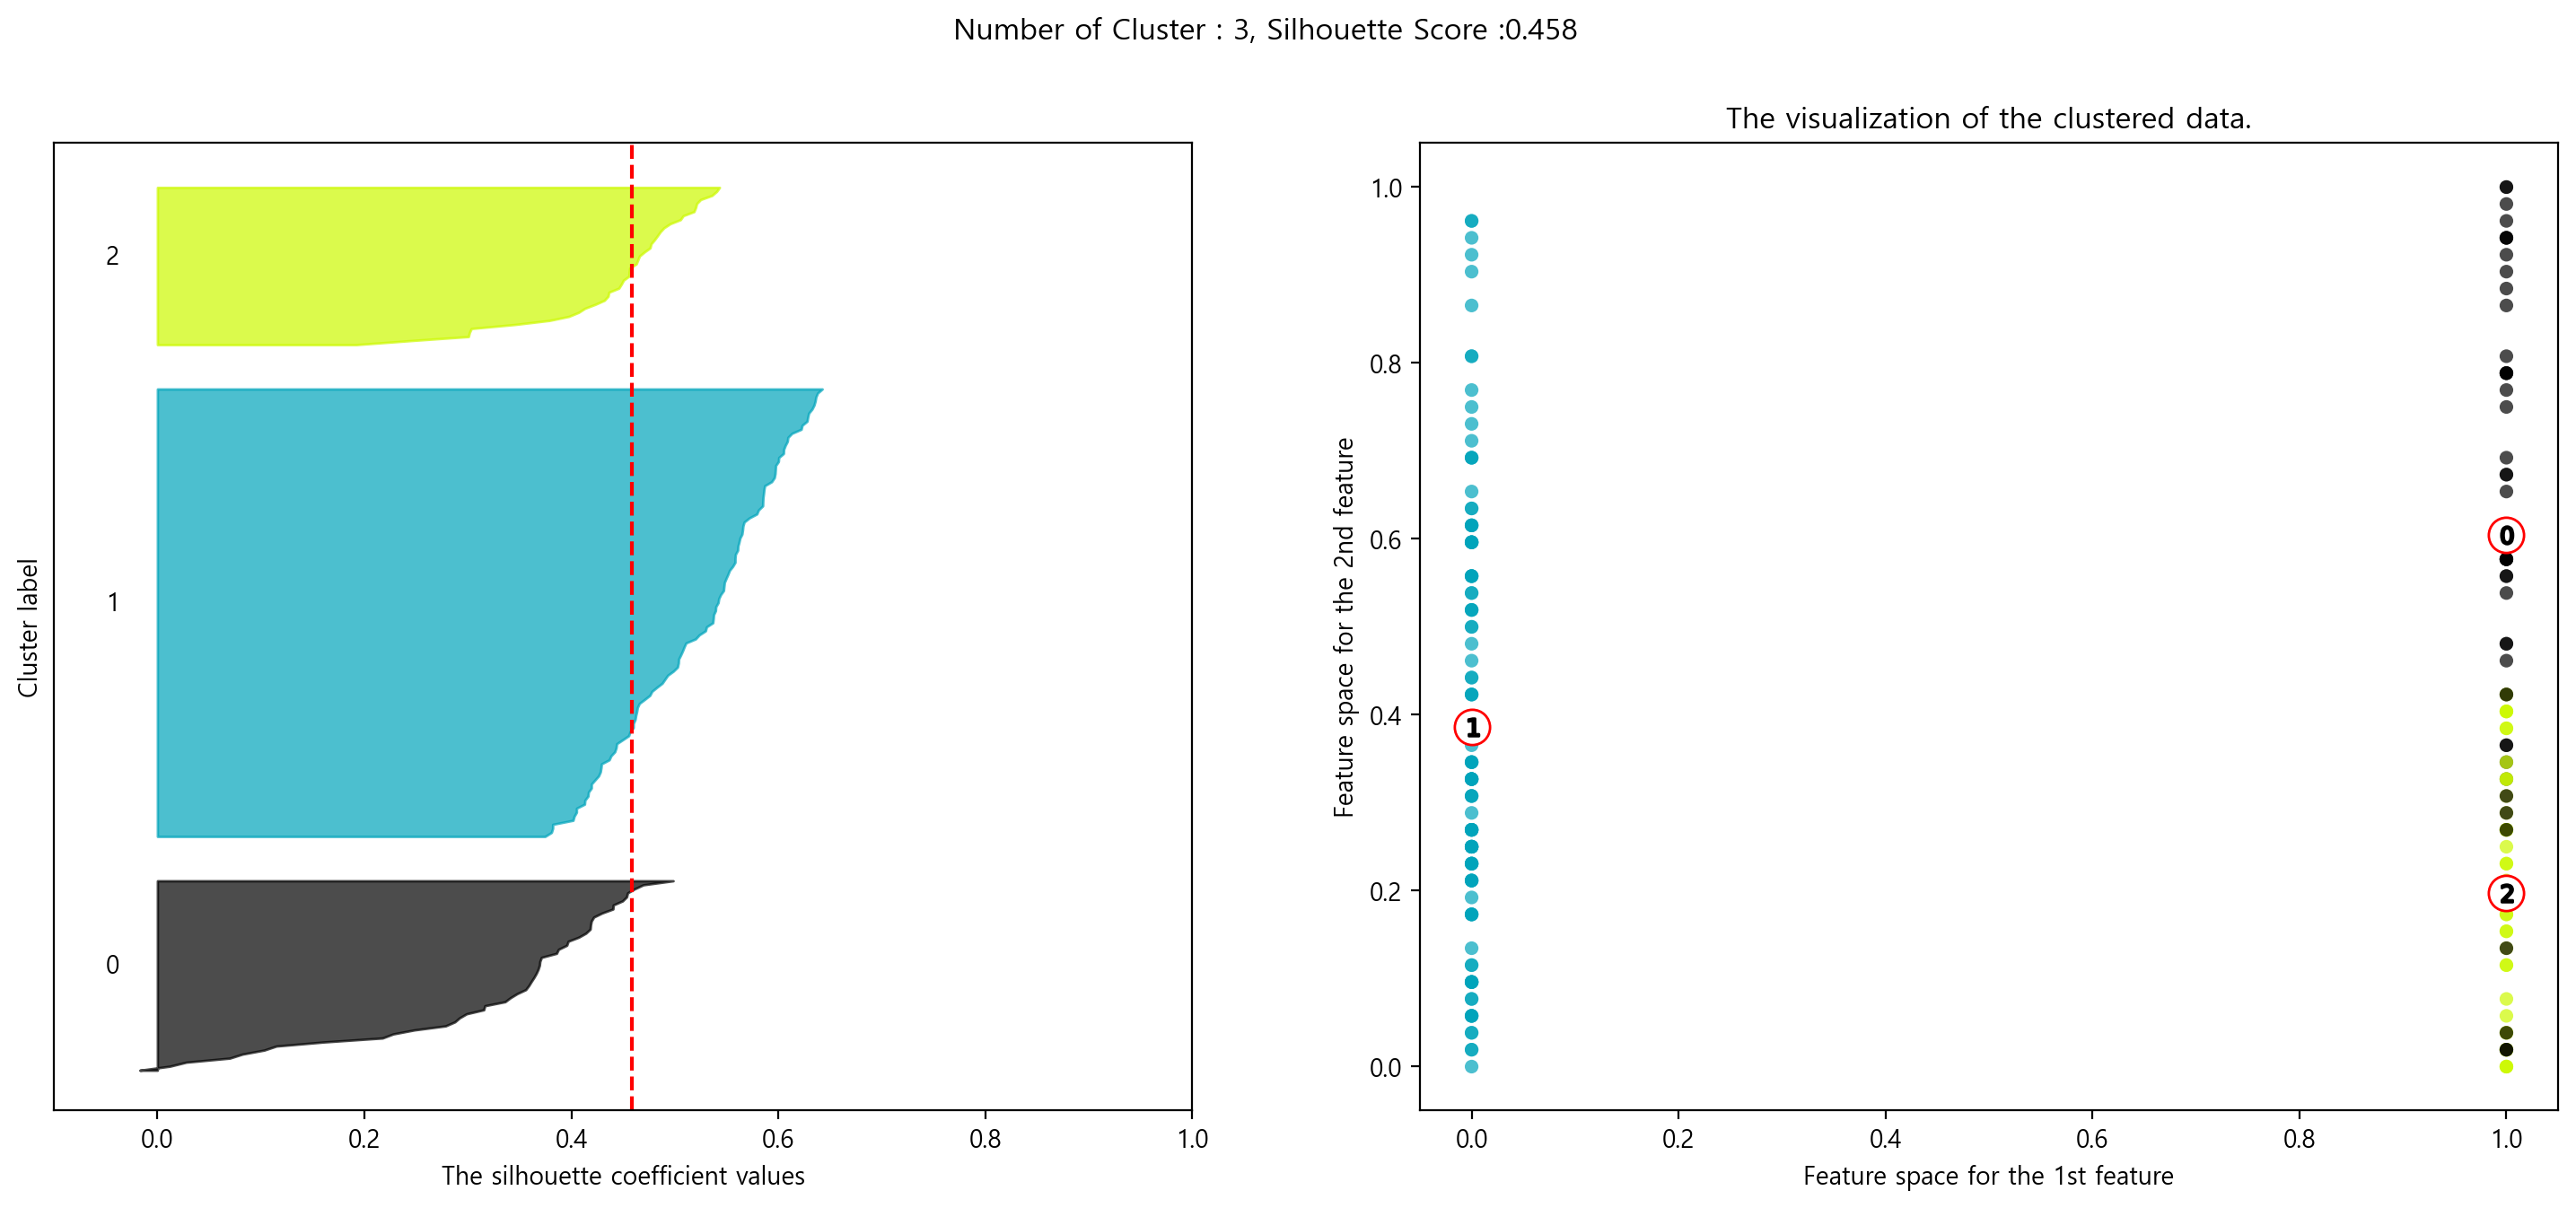

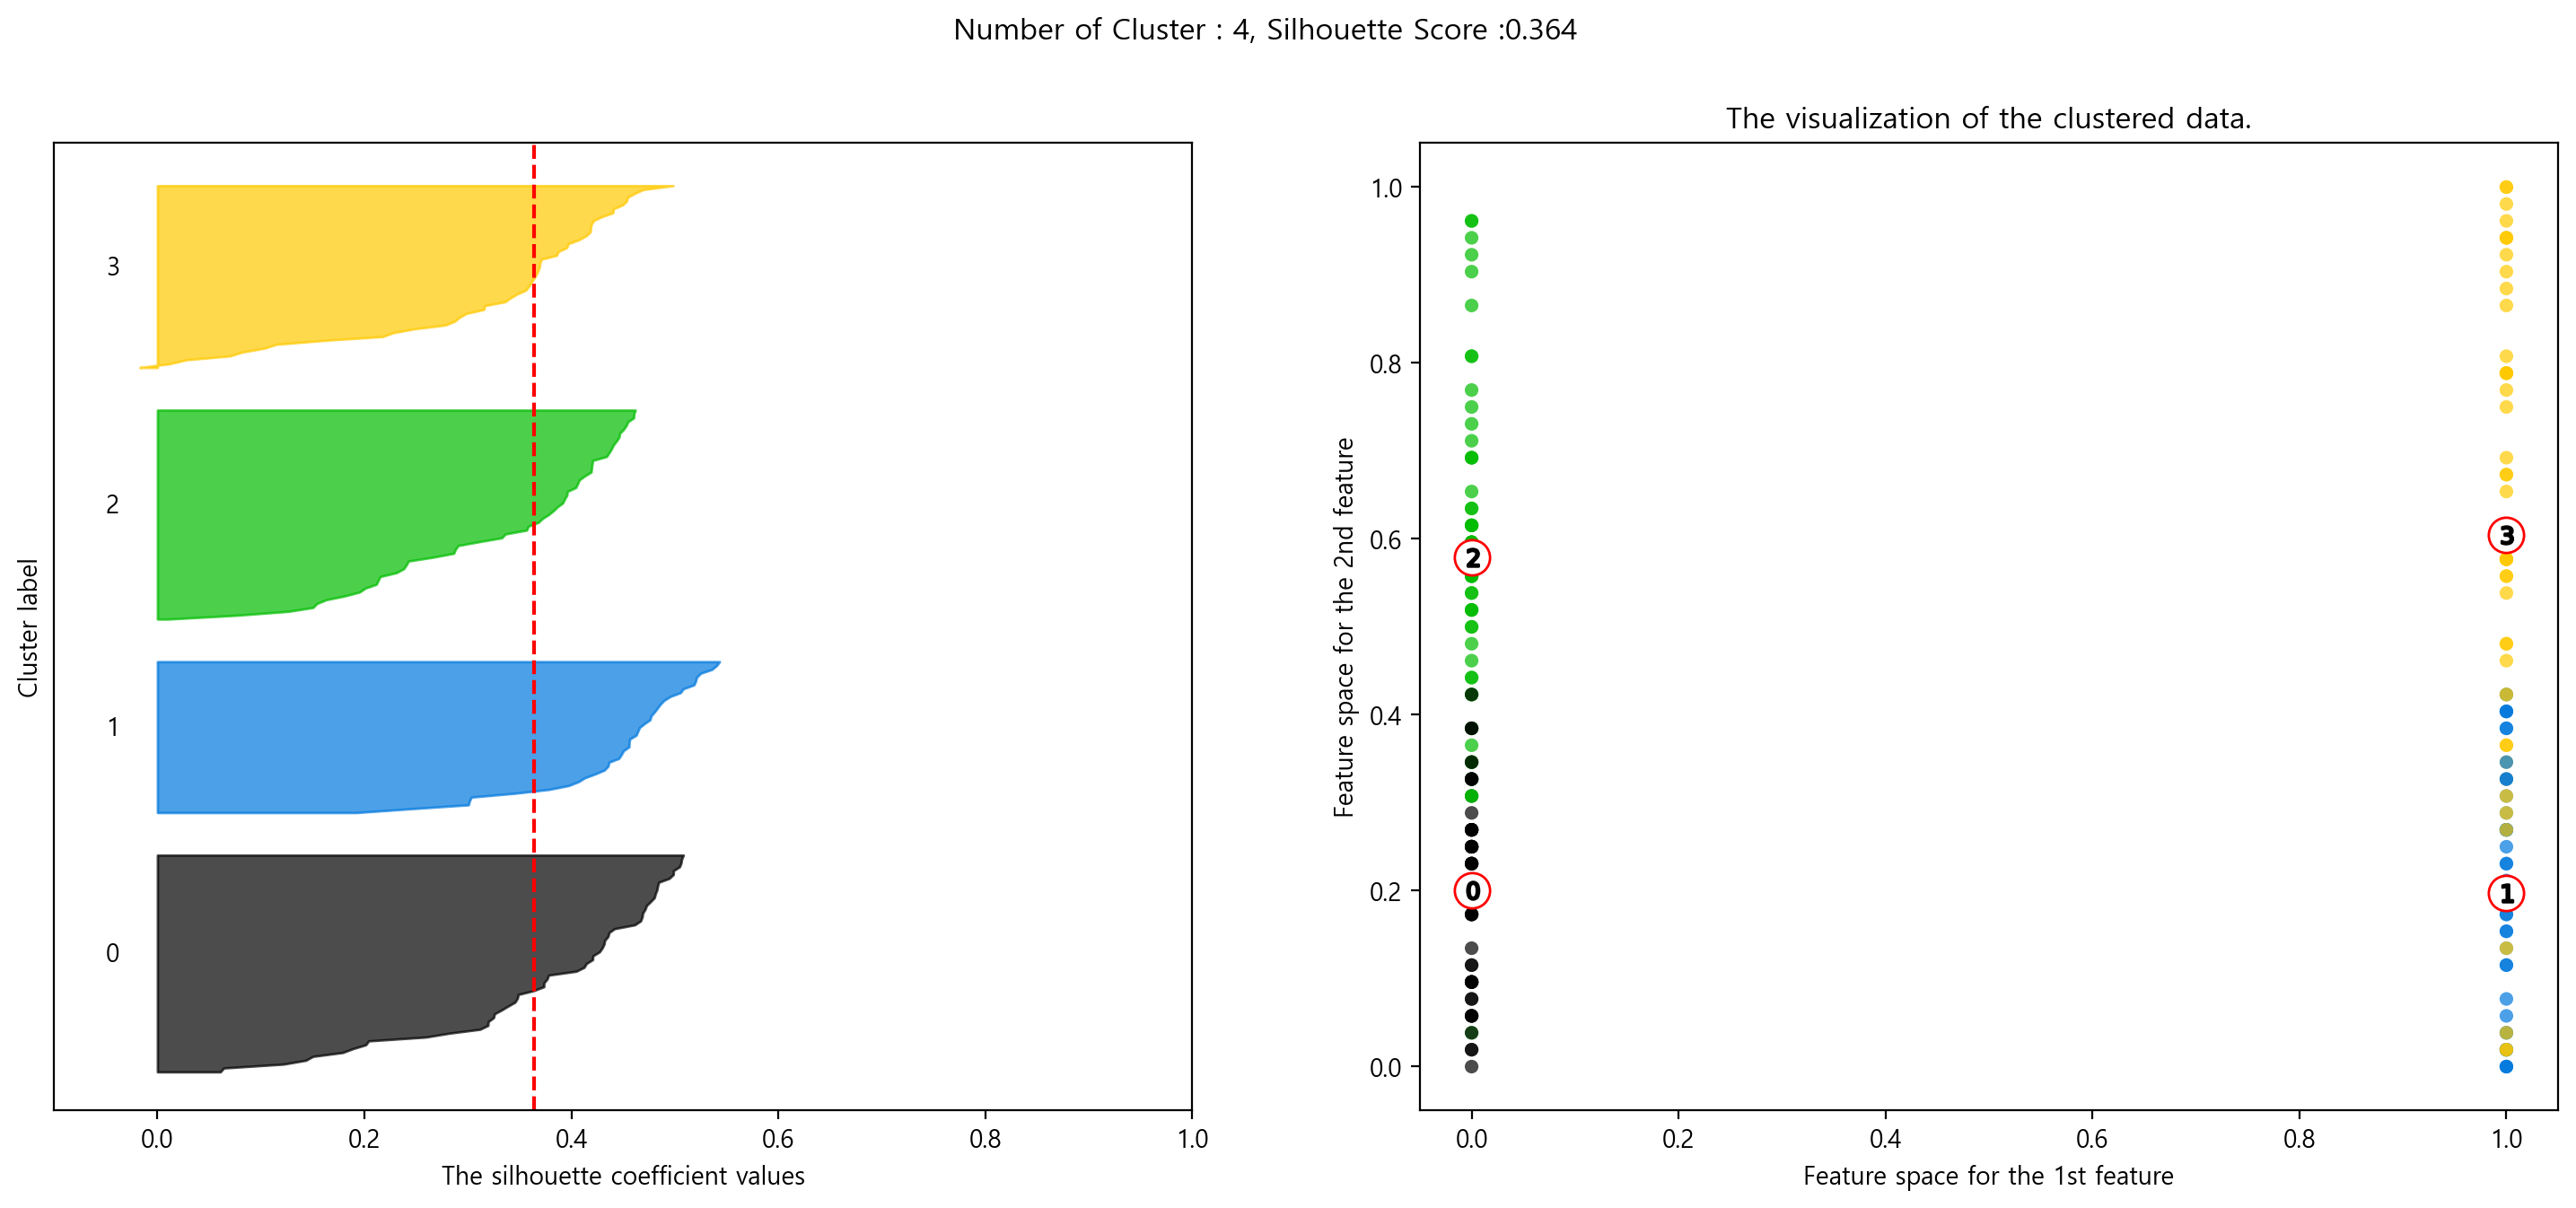

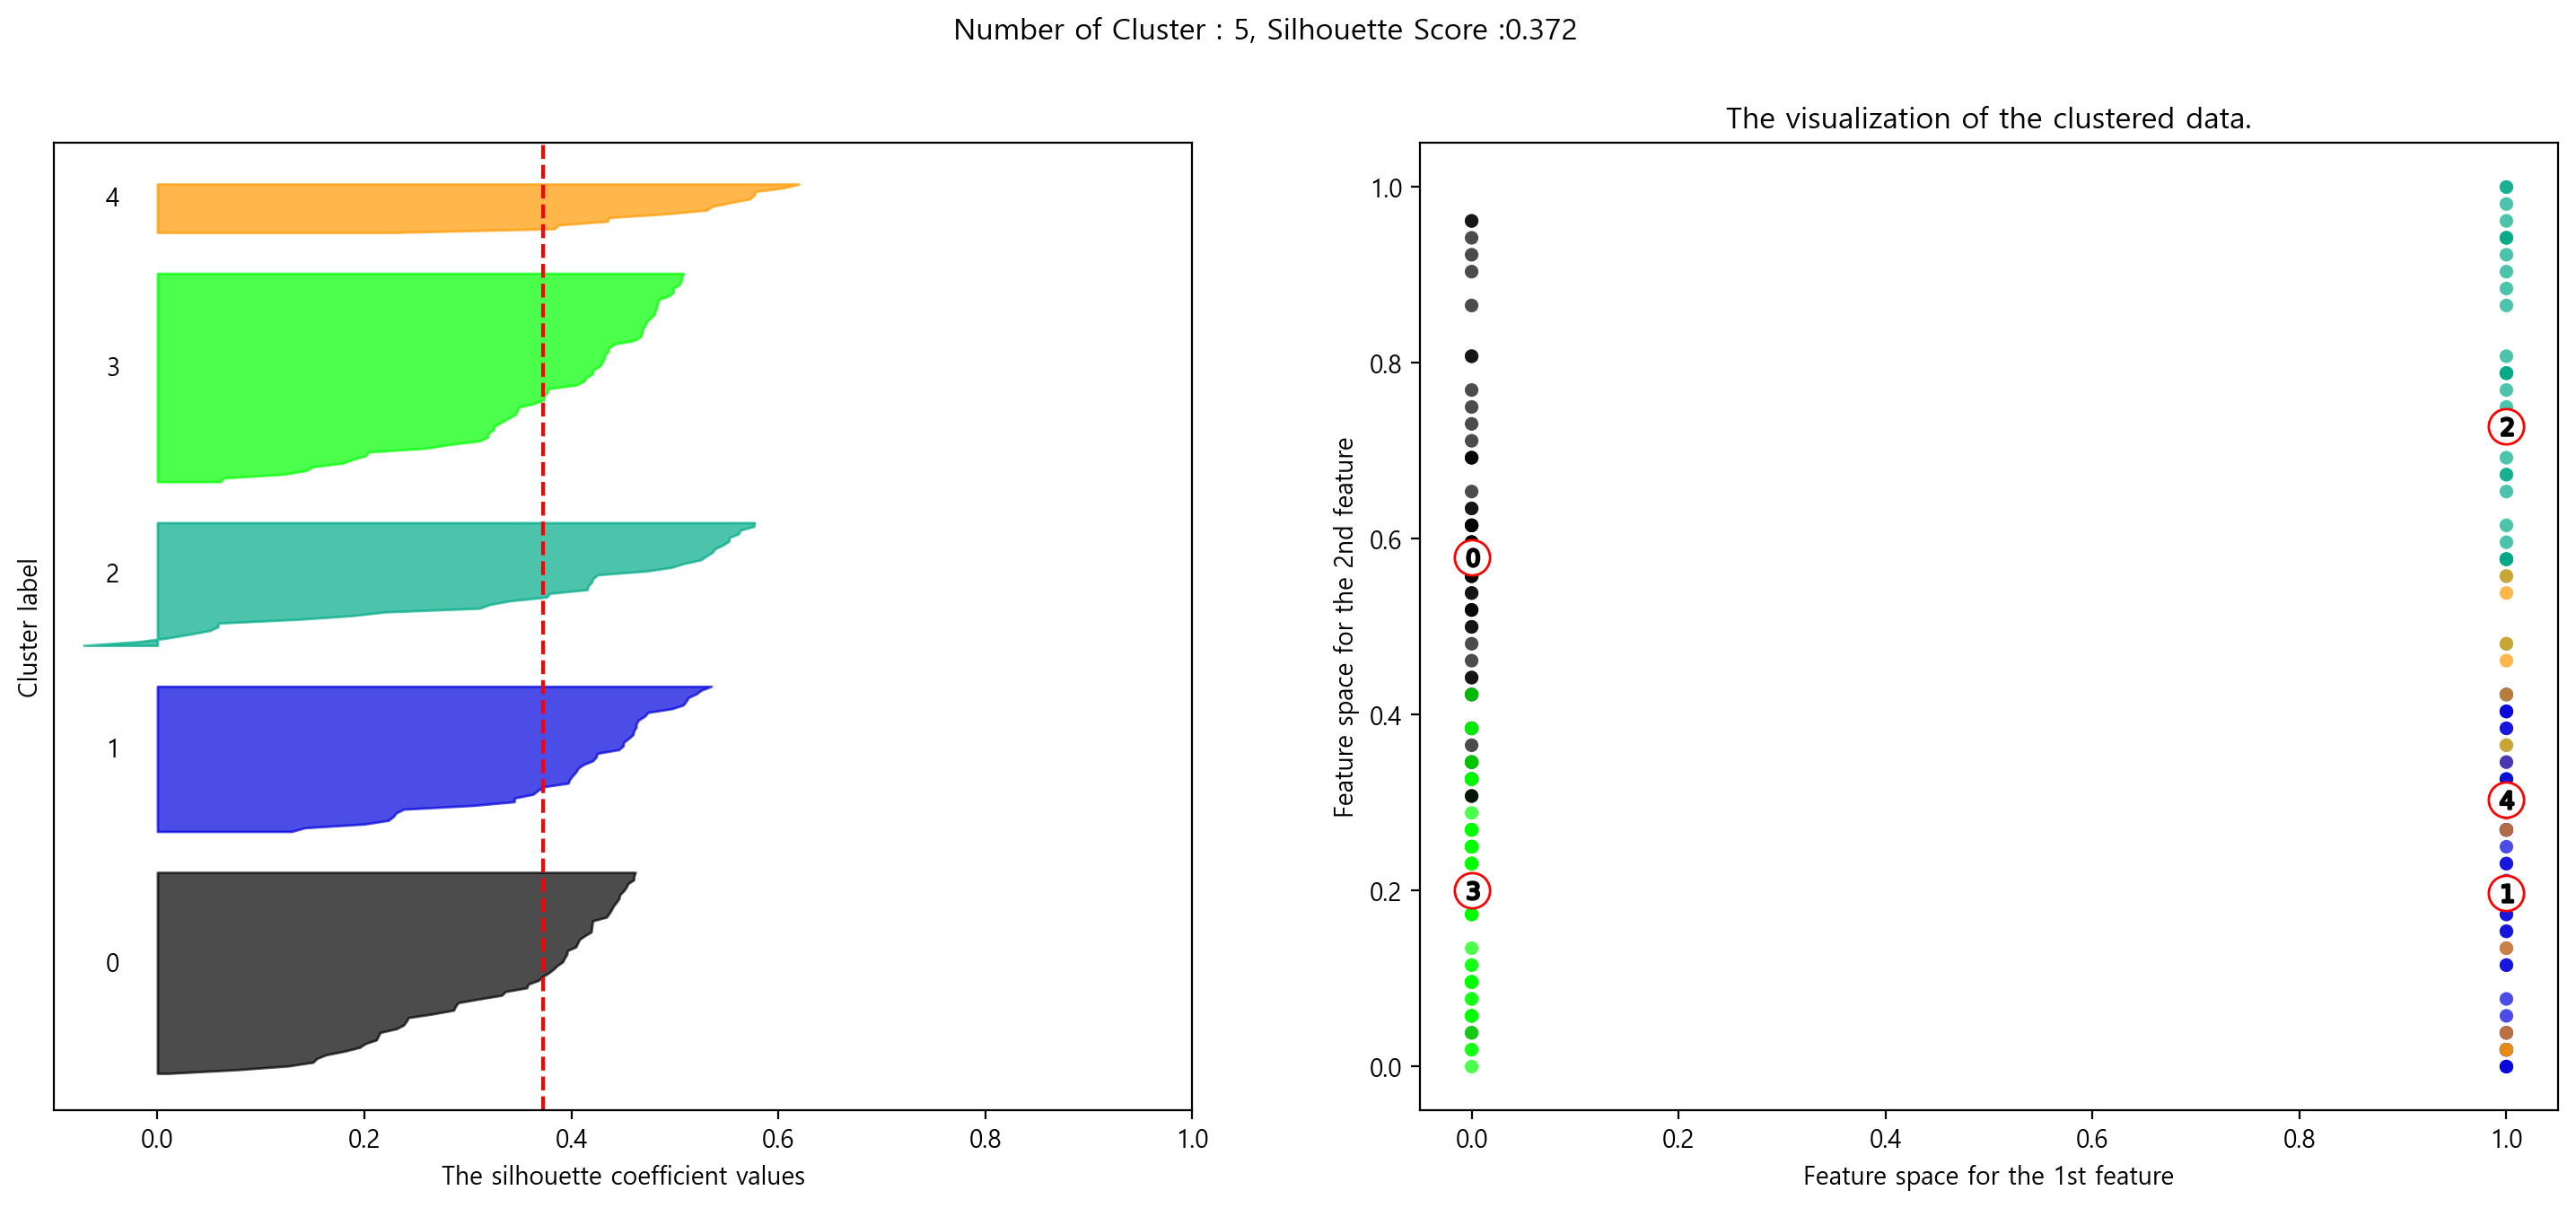

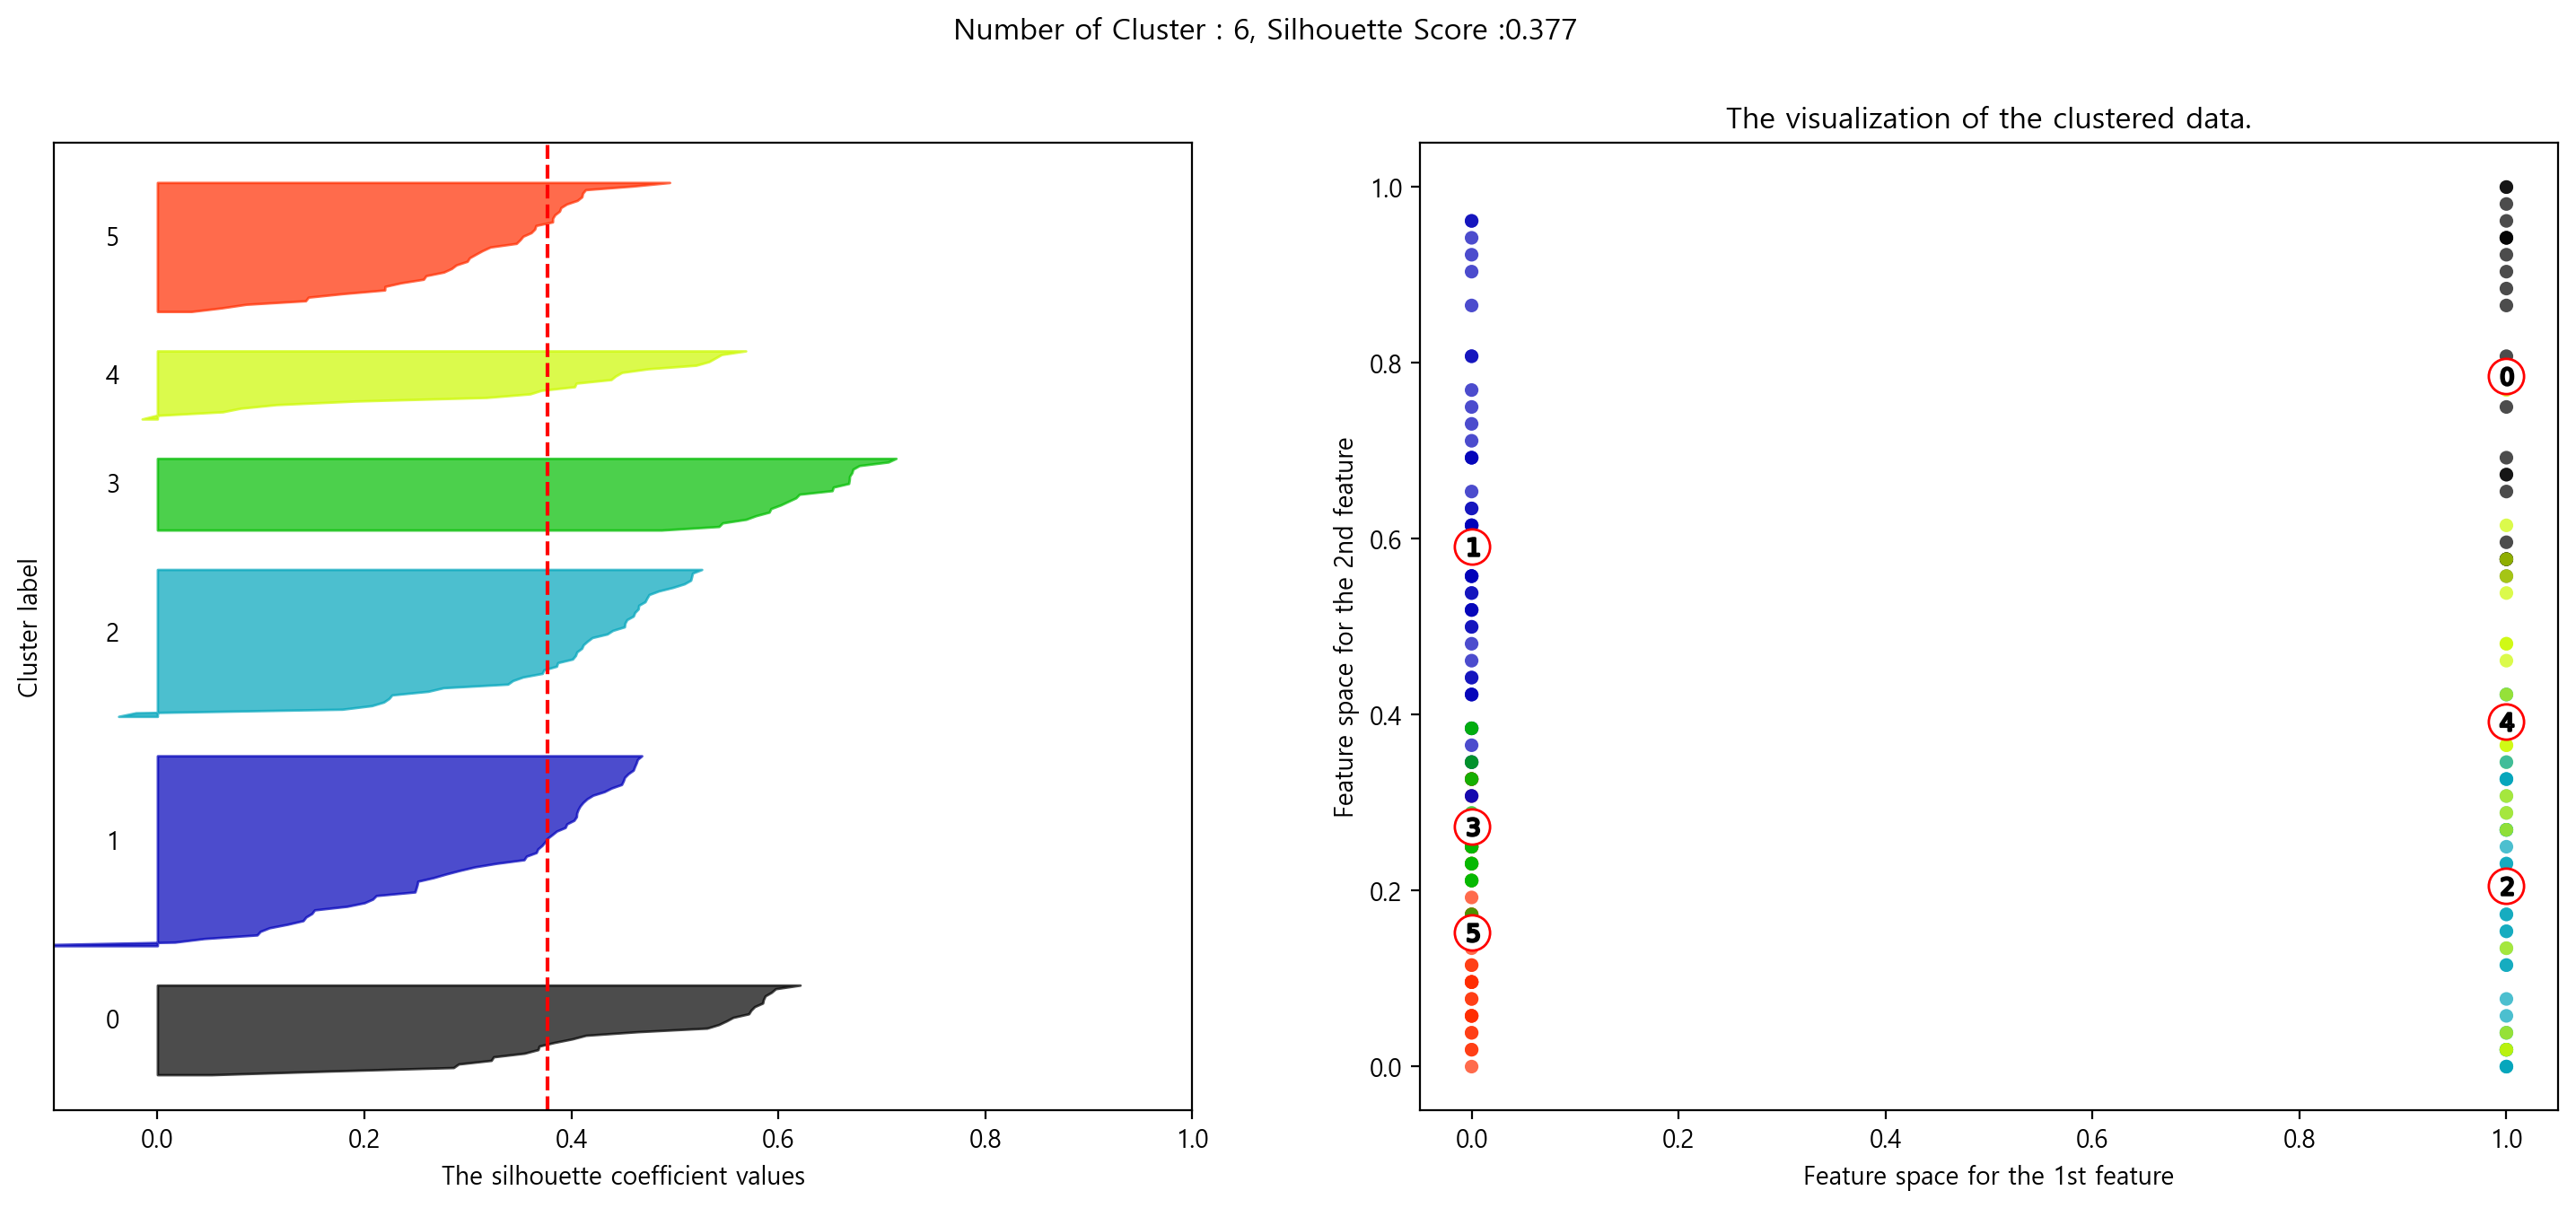

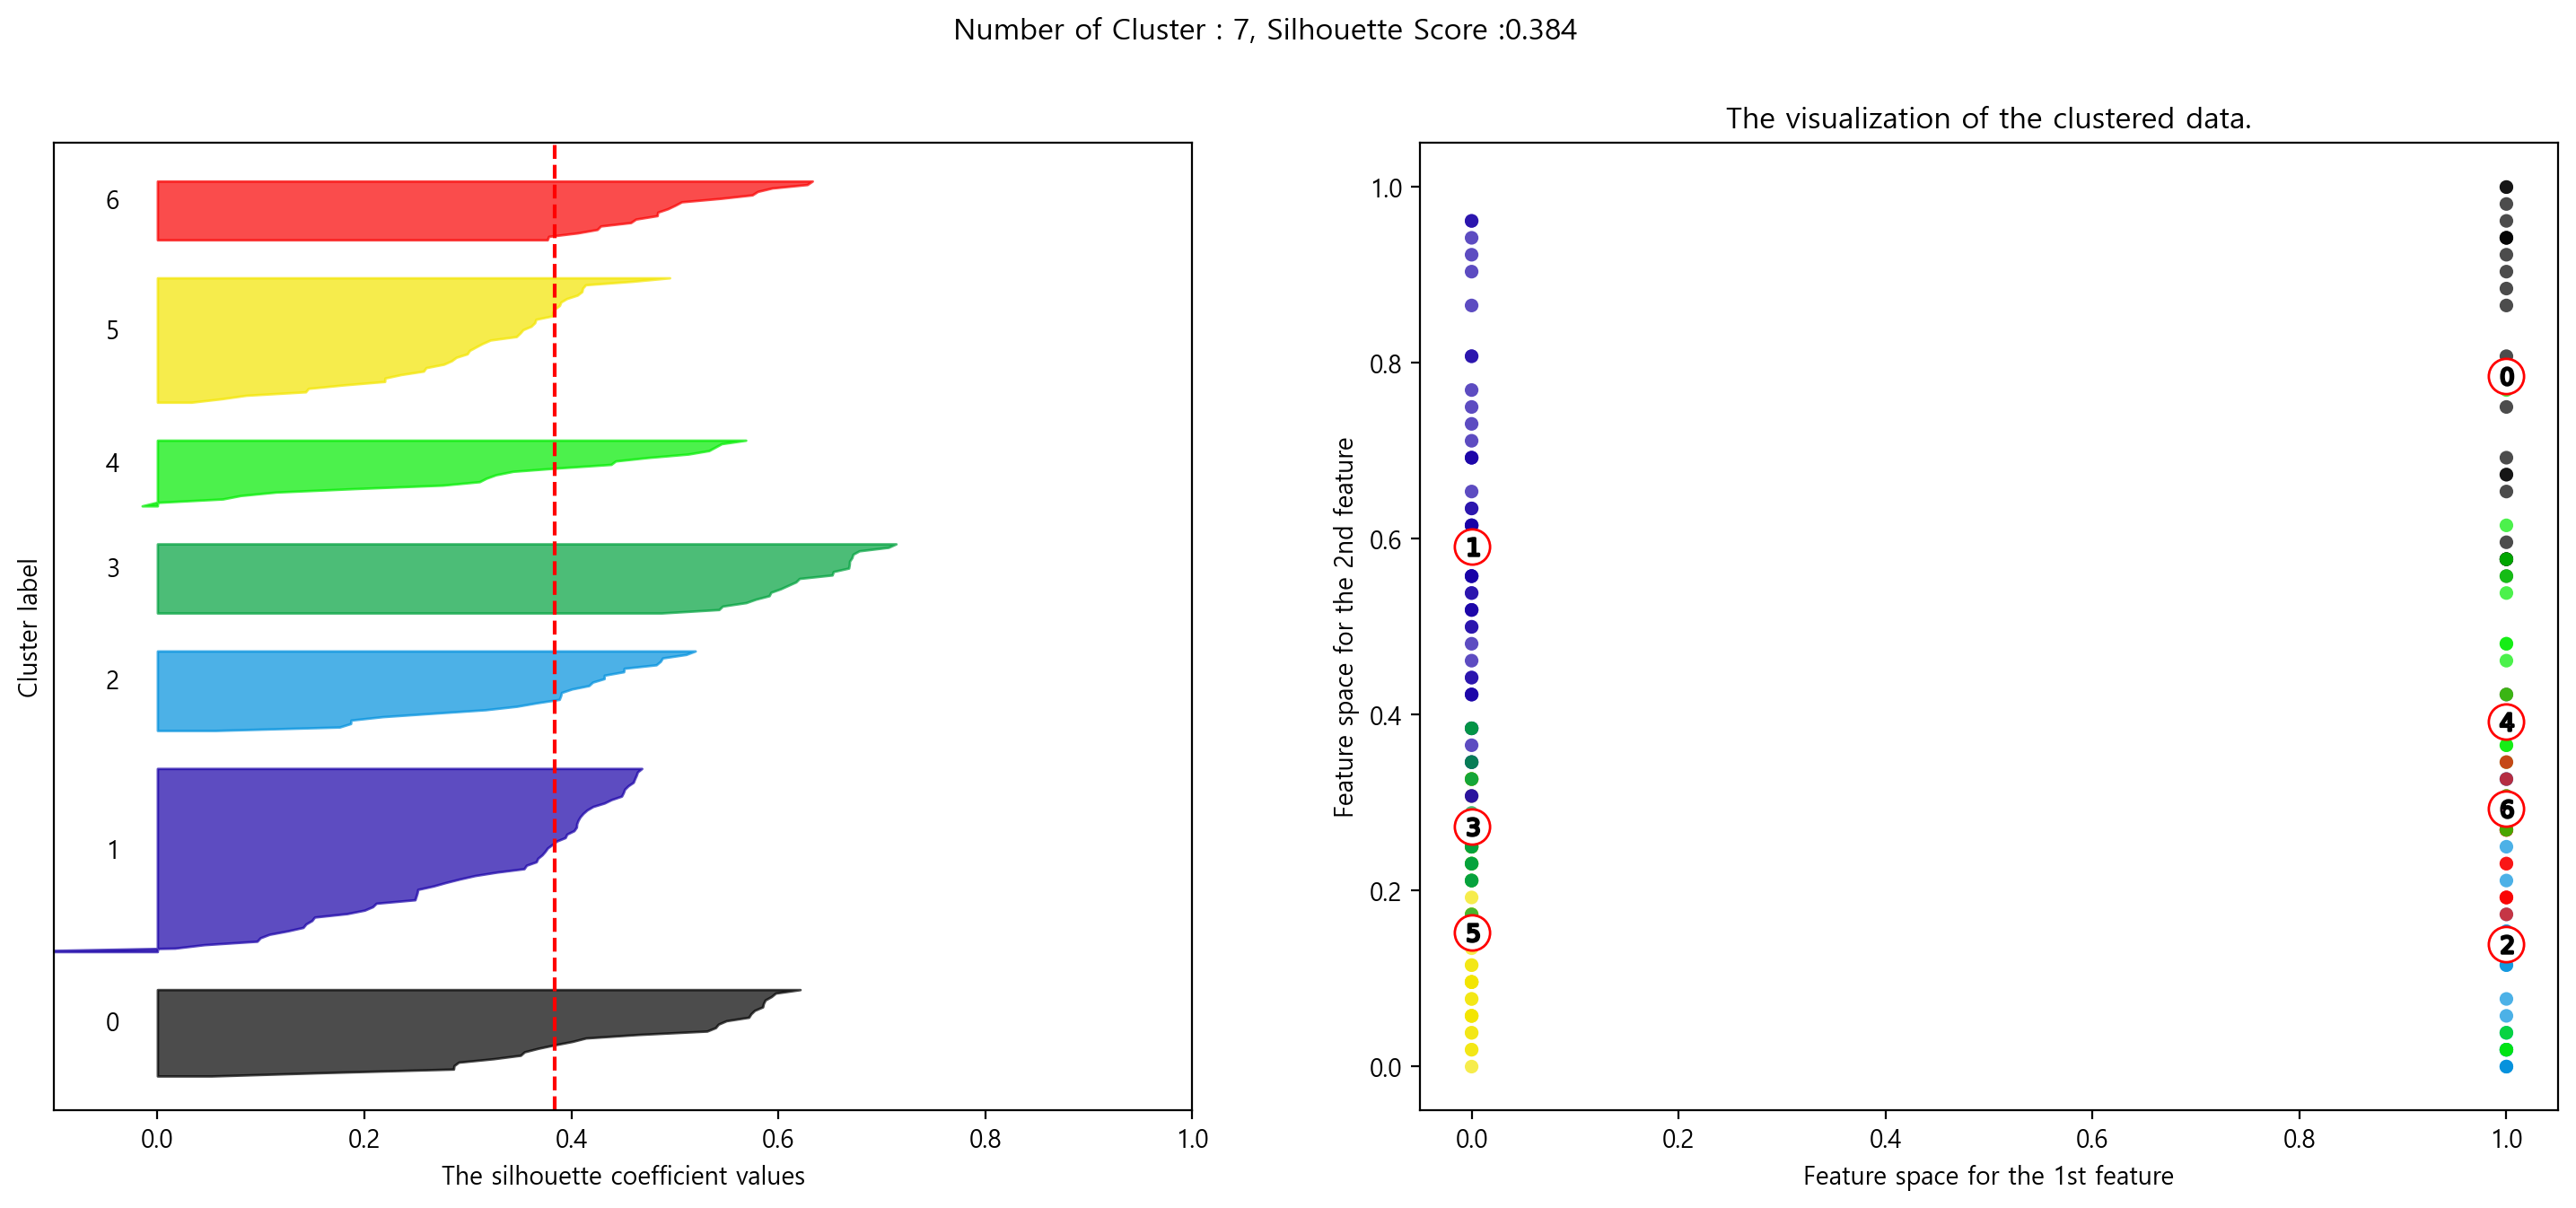

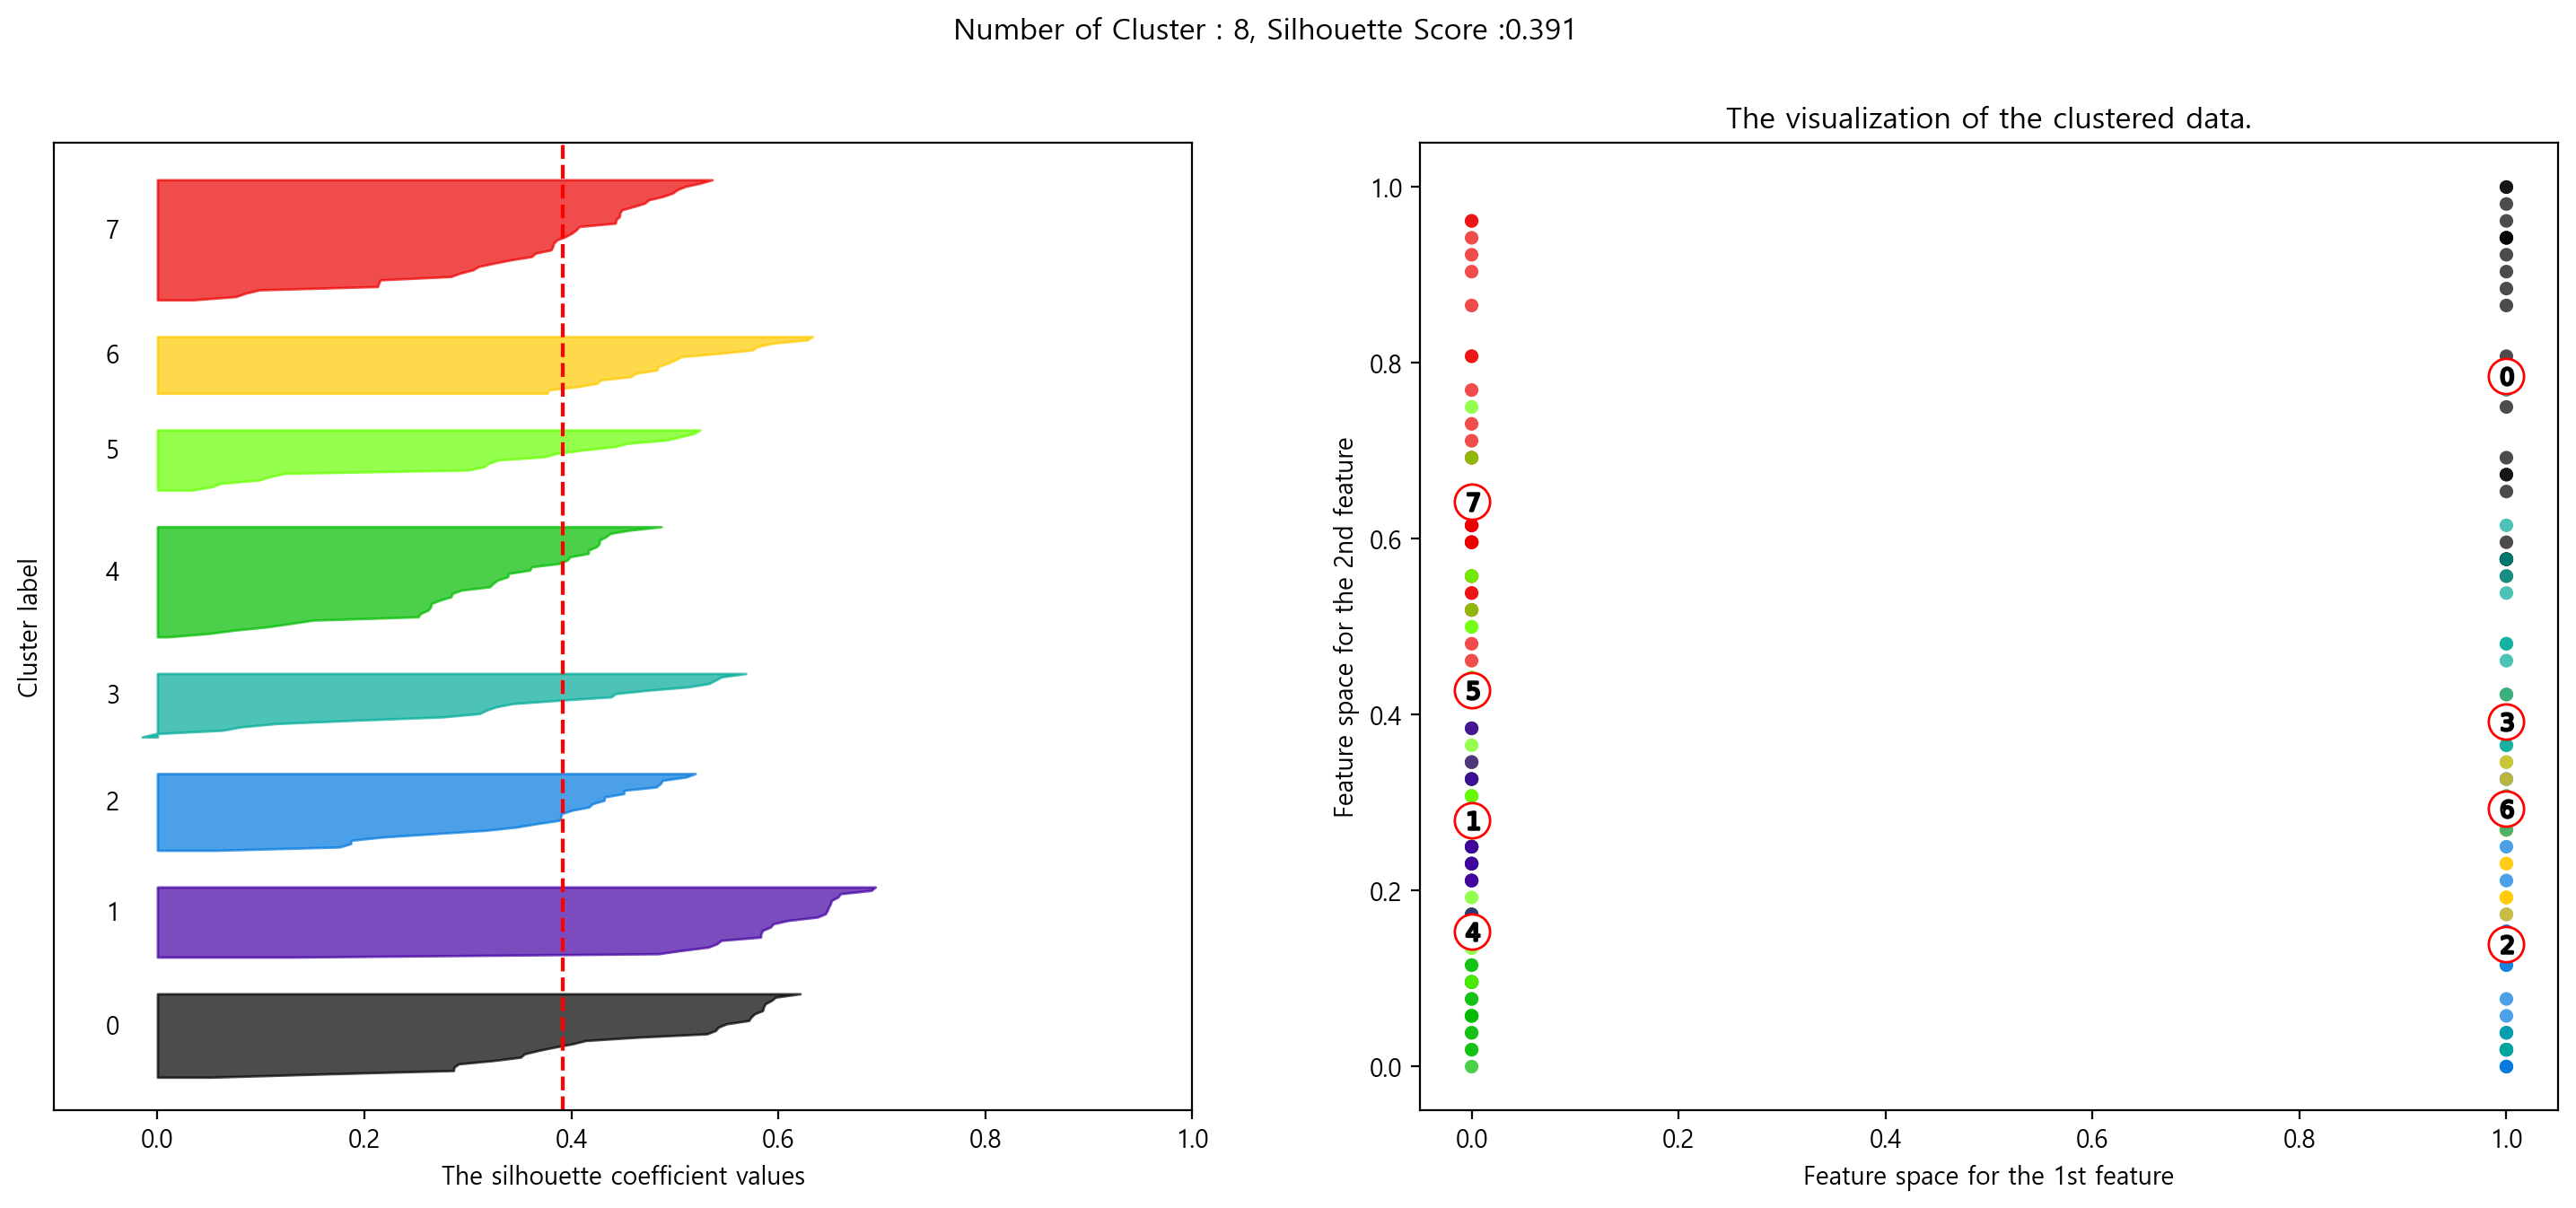

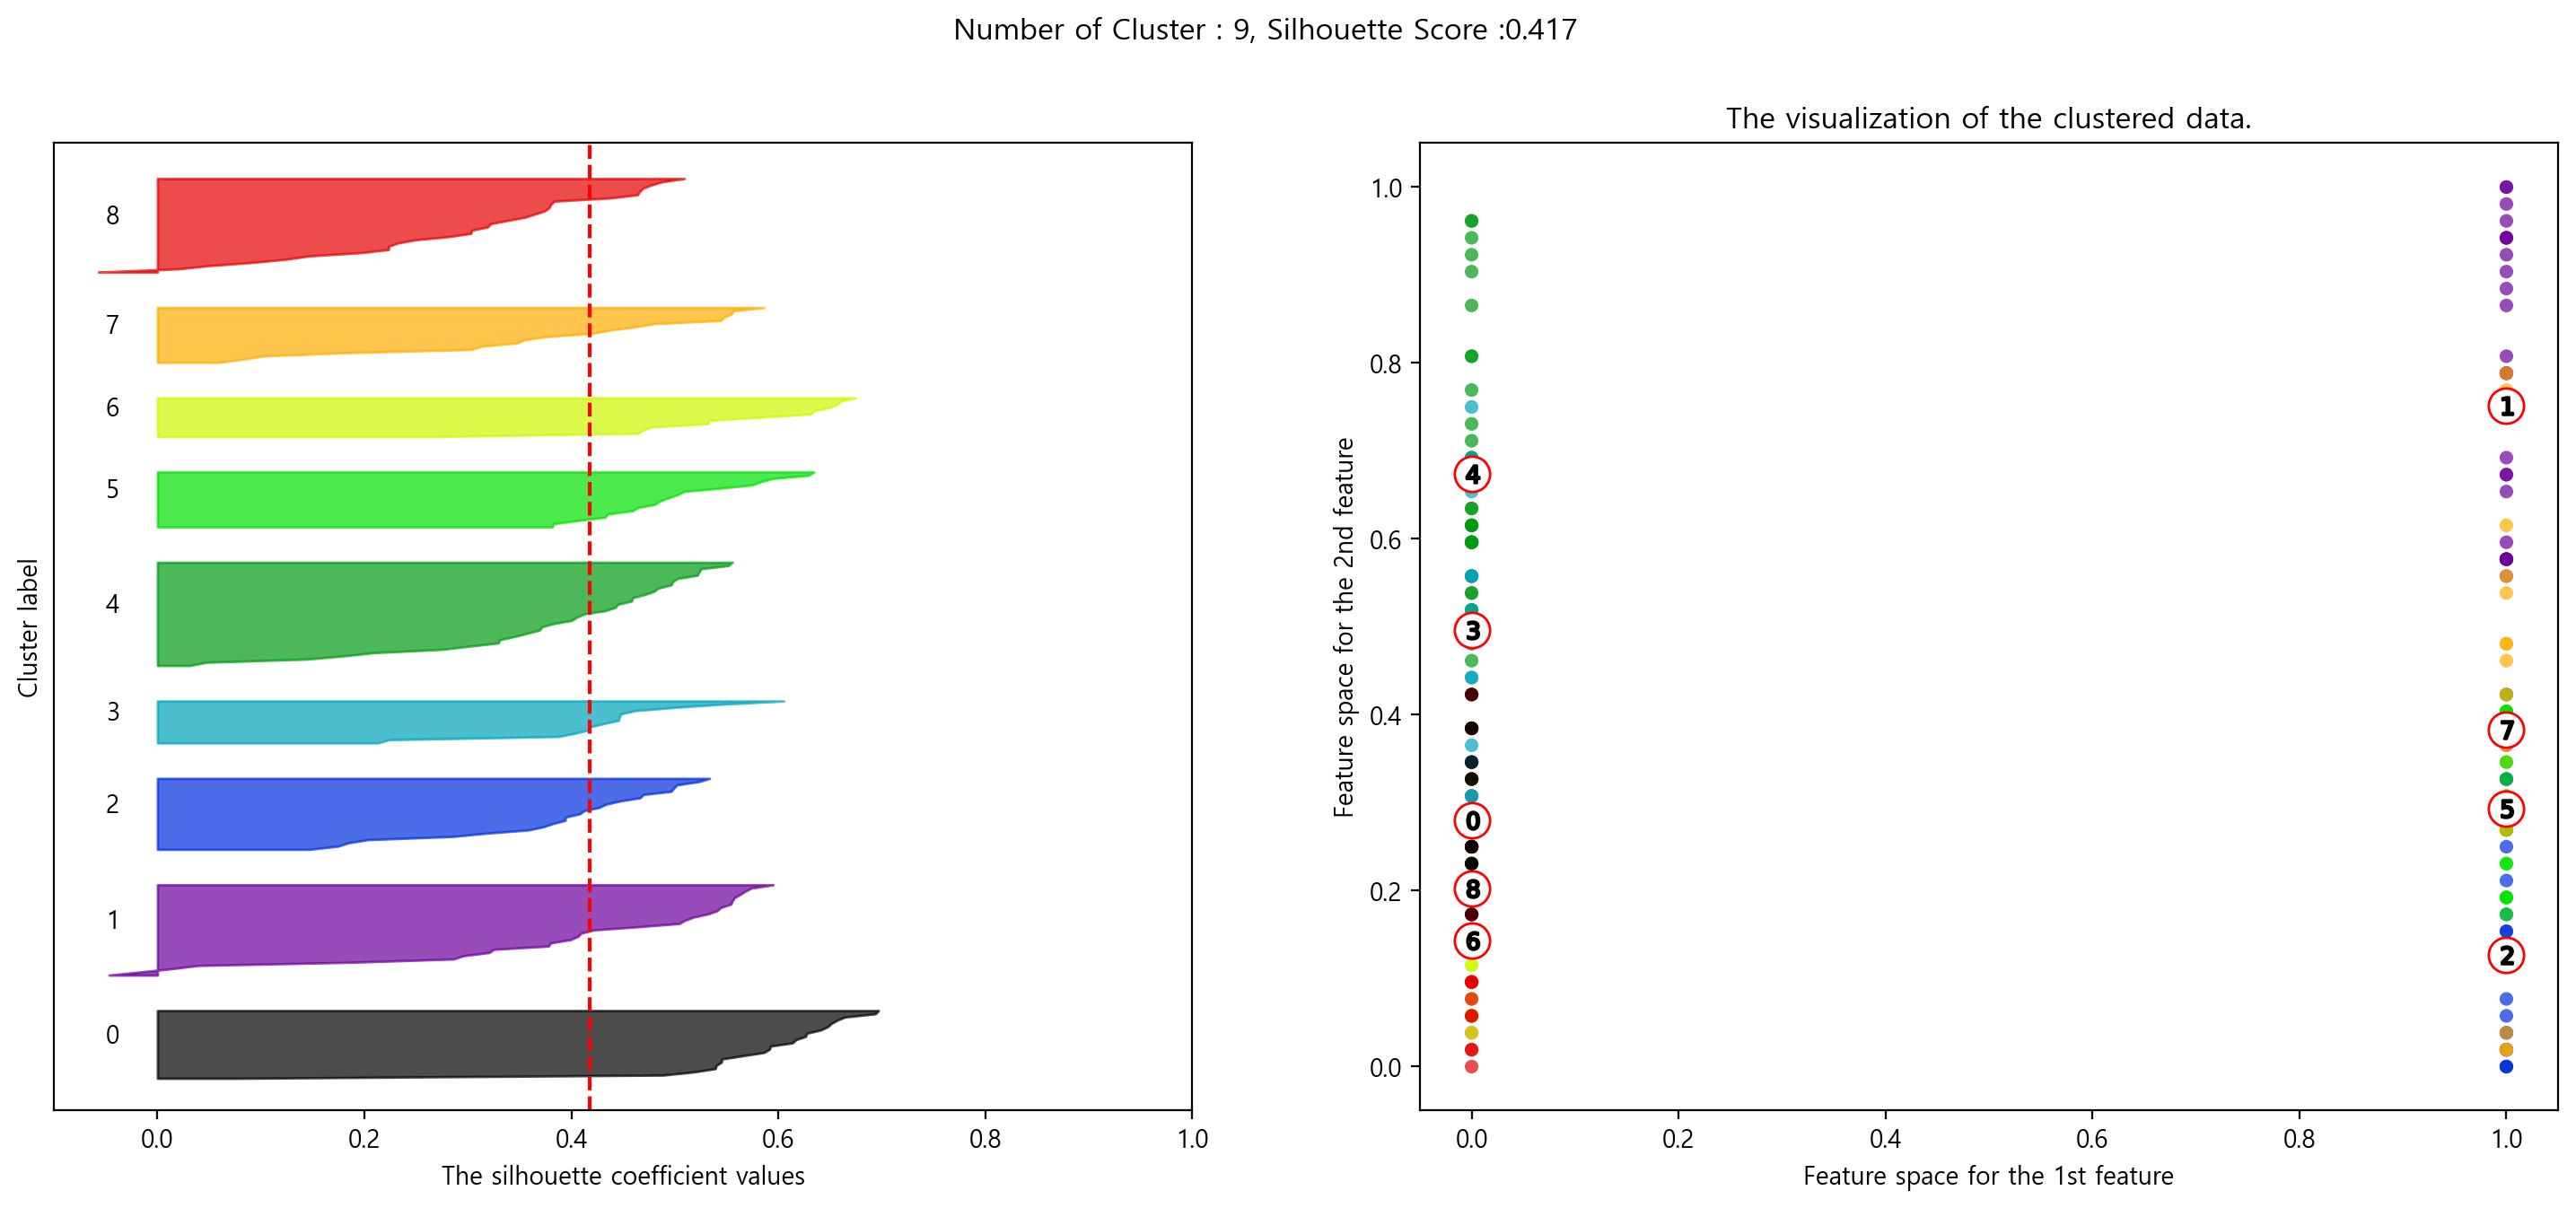

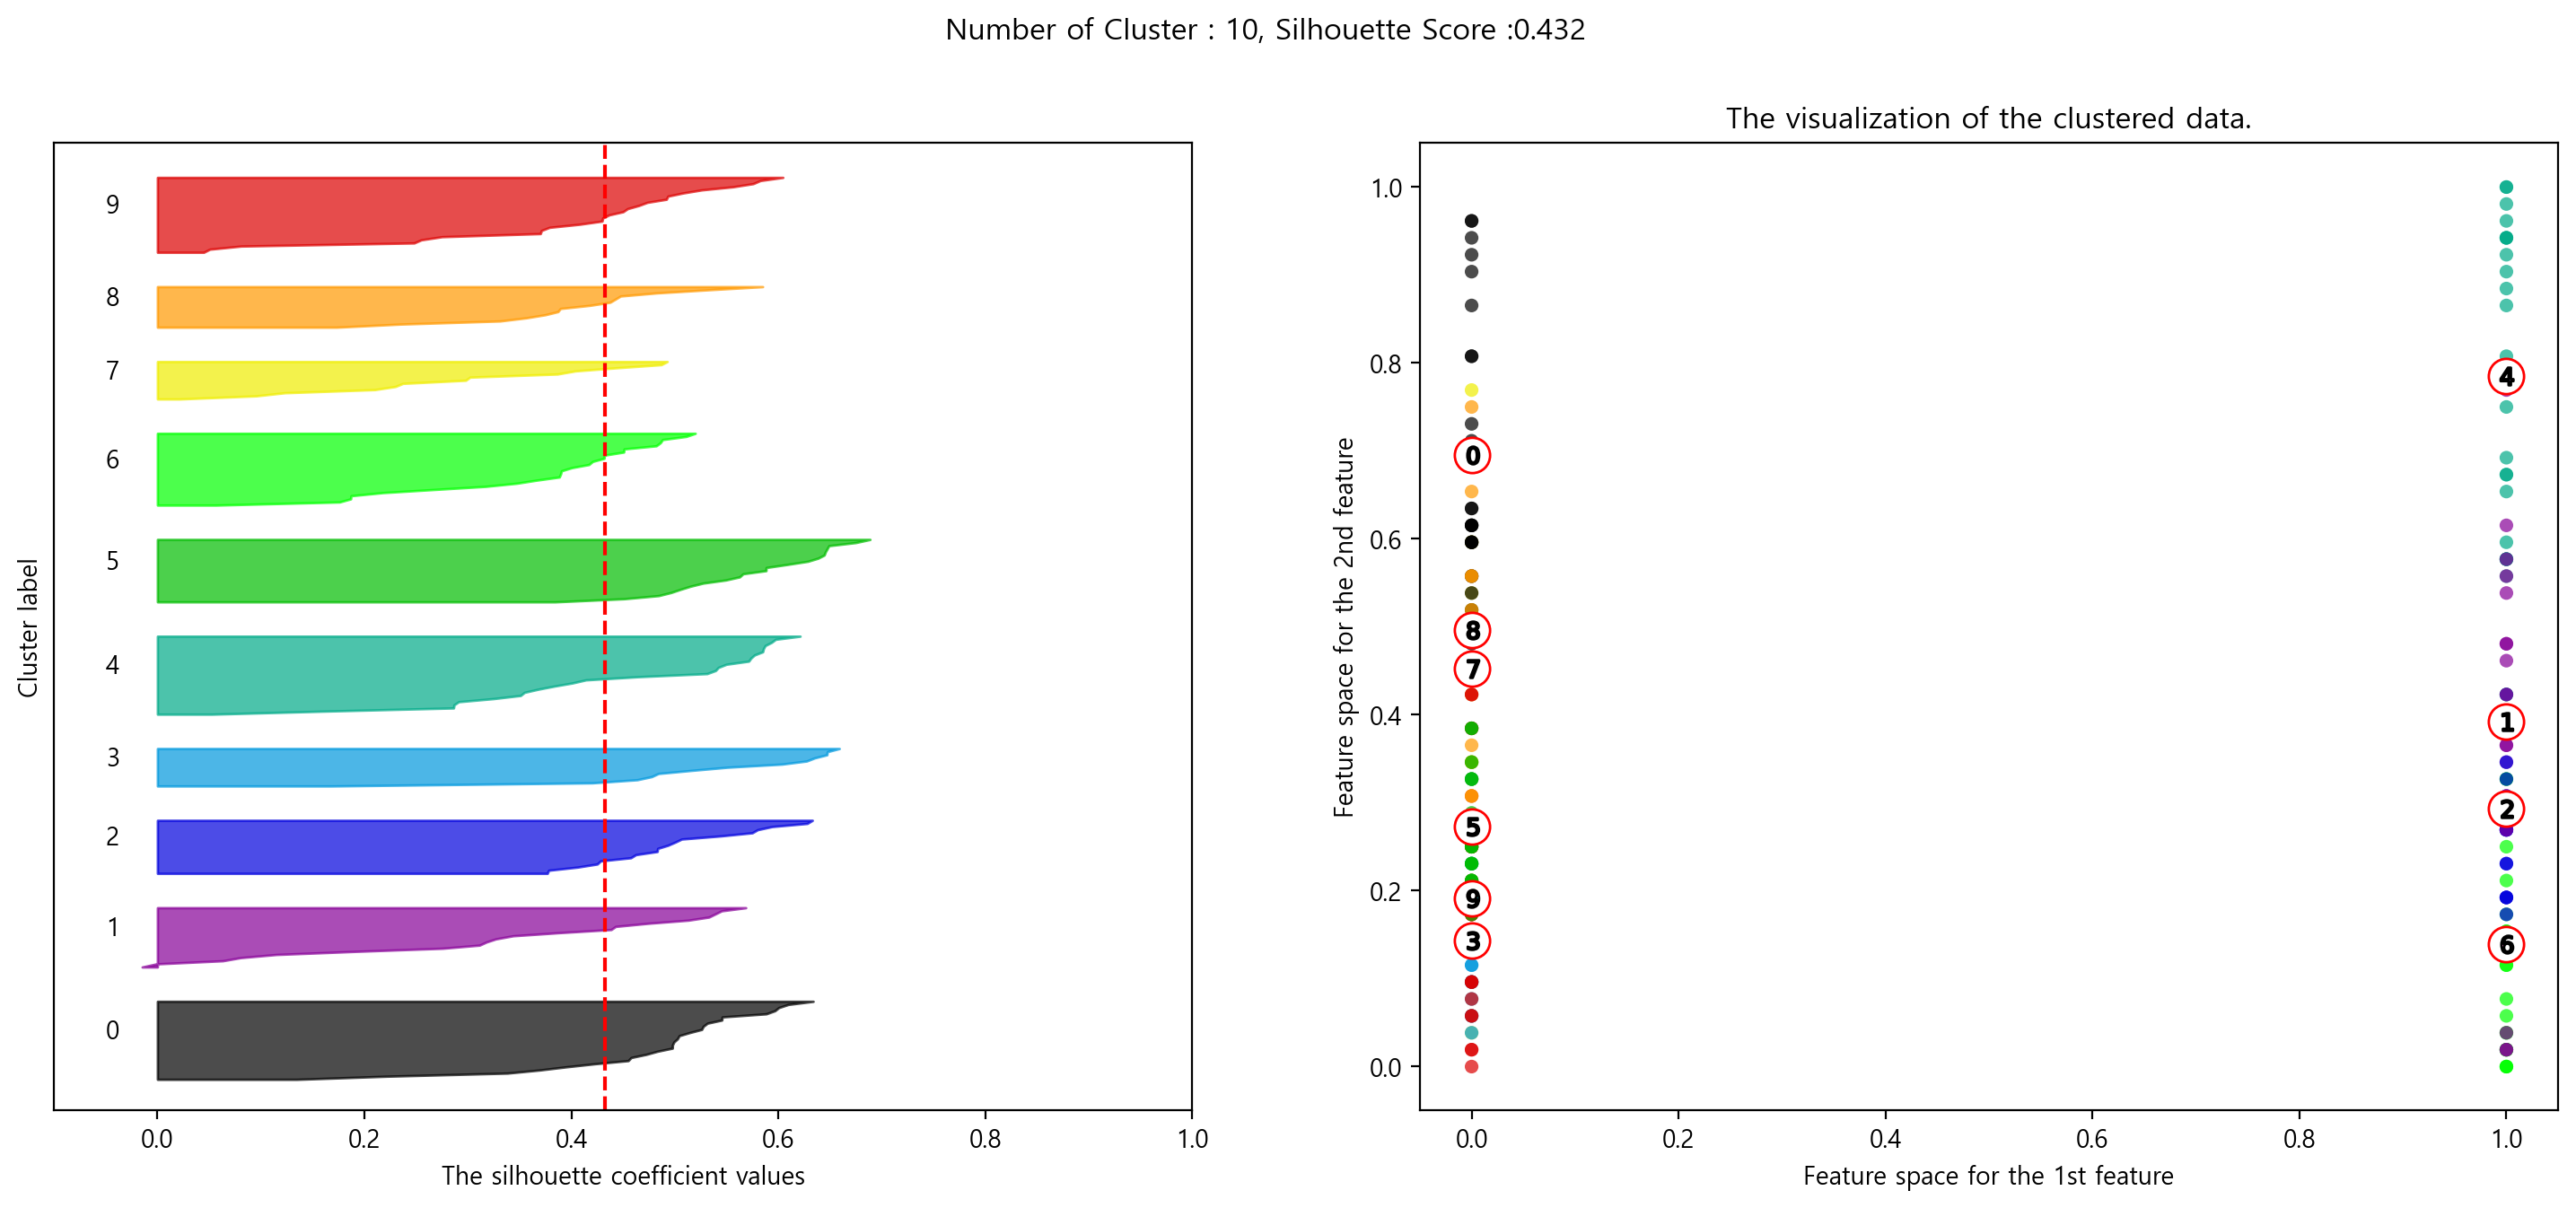

In [28]:
klist = list(range(2, 11))
silhouette = []   # inertia값을 저장할 리스트

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df2)
    cluster = estimator.predict(df2)
    silhouette.append(silhouette_score(X=df2, labels=cluster, metric='euclidean'))
    
    visualize_silhouette(estimator=estimator, X_features=df2, cluster_labels=cluster, n_cluster=k)

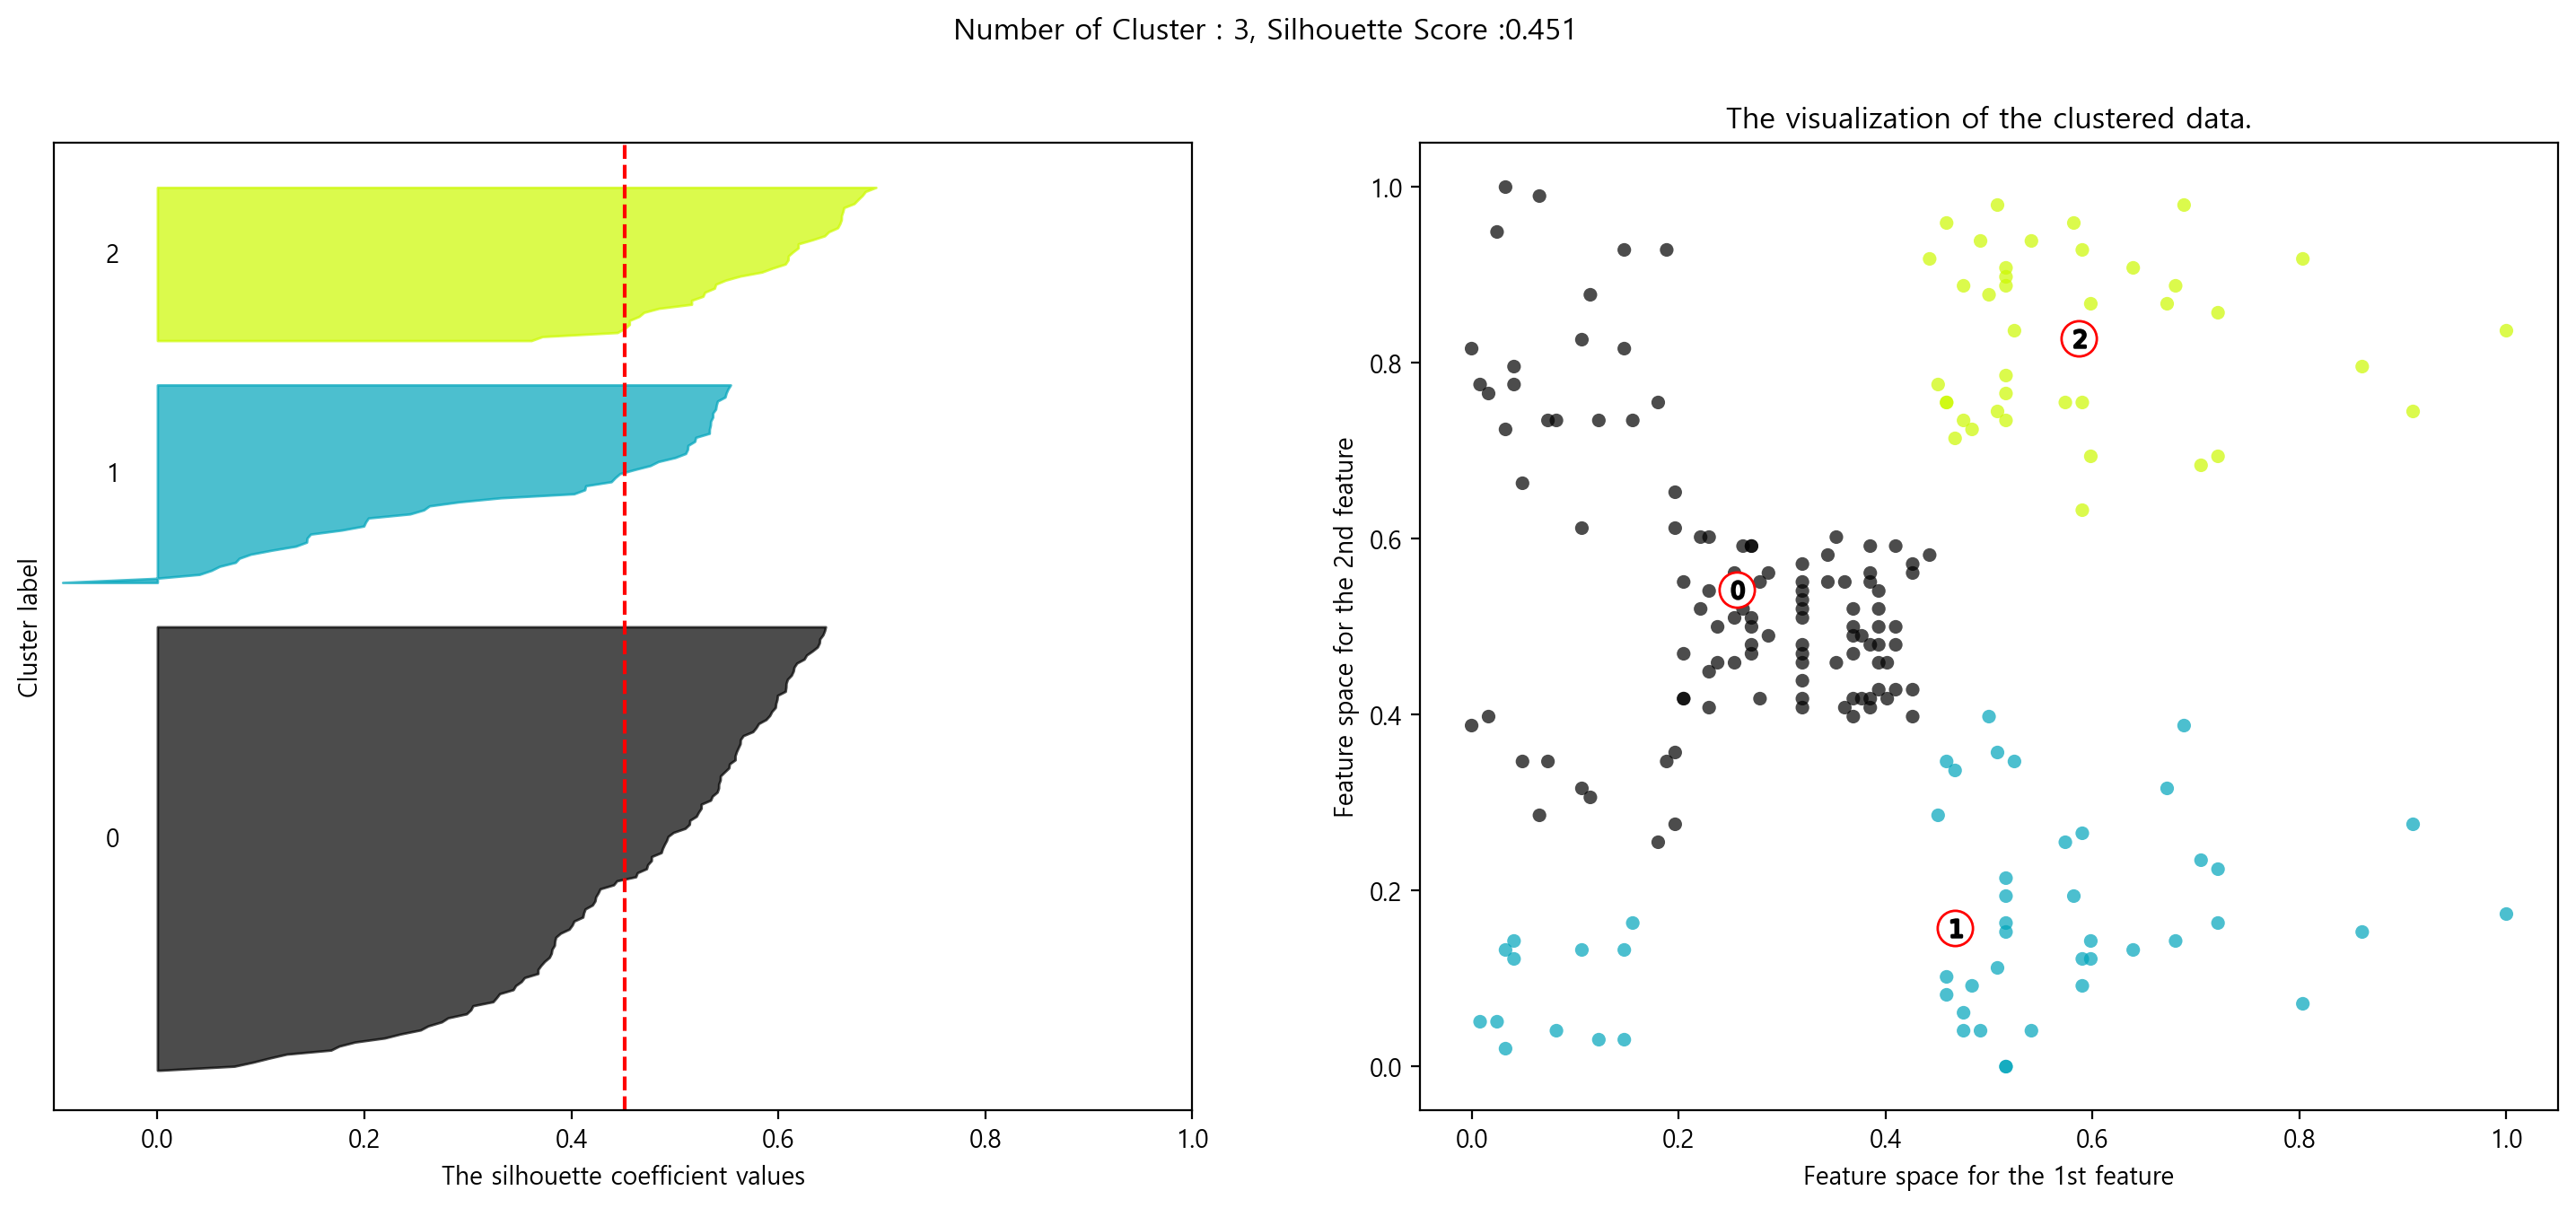

In [ ]:
estimator = KMeans(n_clusters=best_k, random_state=0)
estimator.fit(X=df2)

visualize_silhouette(estimator=estimator, X_features=df2, cluster_labels=cluster, n_cluster=klist[elbow_point])

In [ ]:
# a =len(result_df2[result_df2['cluster']==0])
# b = len(result_df2[result_df2['cluster']==1])
# c = len(result_df2[result_df2['cluster']==2])

# print("각 cluster의 고객 비율 cluster 0: %0.01f, cluster 1: %0.01f, cluster 2: %0.01f" % (a/(a+b+c), b/(a+b+c), c/(a+b+c)))

각 cluster의 고객 비율 cluster 0: 0.2, cluster 1: 0.6, cluster 2: 0.2


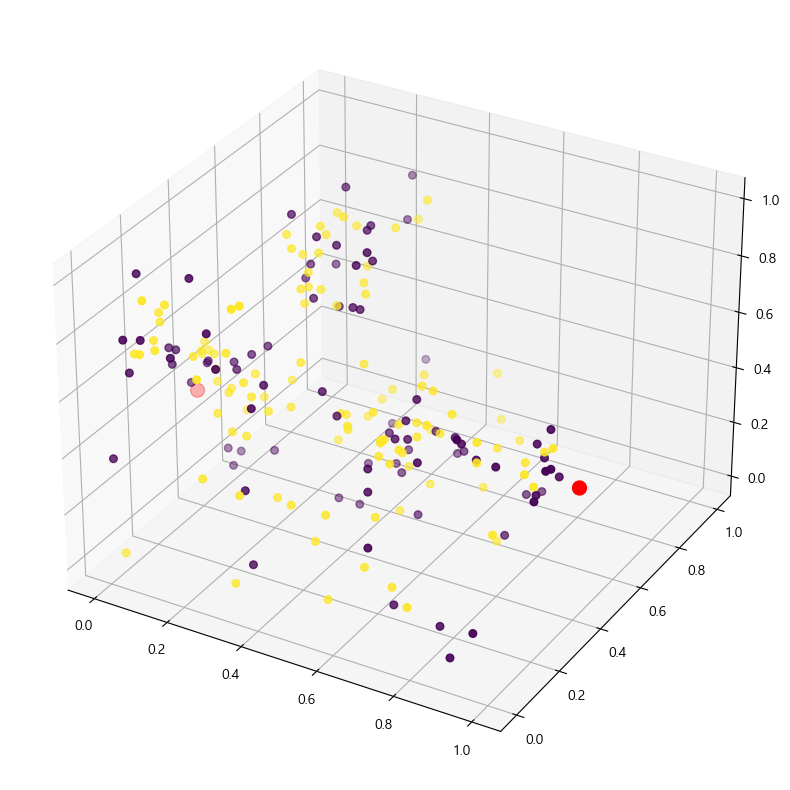

In [32]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# 총 4개의 변수 중에서 3개를 선택함
ax.scatter(xs=result_df['나이'], 
           ys=result_df['연수입'], 
           zs=result_df['지출점수'], 
           c=result_df['cluster'], s=30)

# 중심점 표시
ax.scatter(xs=estimator.cluster_centers_[:, 0], 
           ys=estimator.cluster_centers_[:, 1], 
           zs=estimator.cluster_centers_[:, 2], 
           c='red', s=100)

plt.show()
plt.close()